# Basic Data Exploration

## Importing libraries and loading the data

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [161]:
df = pd.read_csv("swiggy.csv")
df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [162]:
rows, cols = df.shape
print(f"The data has {rows} rows and {cols} columns.")

The data has 45593 rows and 20 columns.


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

**Data type corrections to be done:**
1. `Delivery_person_Age` should be numerical.
2. `Delivery_person_Ratings` should be float.
3. All the date and time related columns should be of the `datetime` type.
4. `Vehicle_condition` seems to be a categorical column that is integer encoded.
5. `multiple_deliveries` should be an integer column.
6. The target column, i.e., `Time_taken(min)`, should be numerical.

## Checking for missing values

In [164]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [165]:
df.isna().sum().sum()

0

Looks like the data does not have any missing values. However, let's investigate further.

In [166]:
df.sample(50)

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
11382  0xc4e8     LUDHRES05DEL01                   25                       5   
13993  0x5aa2    COIMBRES06DEL02                   32                     4.2   
12051  0x8852      SURRES04DEL02                   26                       5   
5523   0xcf7e      GOARES08DEL01                   24                     4.6   
30040  0xcec1      BHPRES15DEL01                   33                     4.9   
10983  0xdd9d      BHPRES20DEL03                   27                     4.8   
28808  0x3aee   RANCHIRES20DEL03                   35                     4.7   
44394  0xca22      KOCRES18DEL01                   27                       5   
43537  0x44ac      VADRES18DEL02                   31                     4.7   
2448   0x9843    COIMBRES07DEL03                   39                     4.9   
15657  0xd42f      KOCRES06DEL01                   38                     4.5   
31051  0x5ef4      VADRES09DEL01                   32                       5   
9966   0x89cc     BANGRES11DEL02                   26                     4.8   
29450  0x5830      MYSRES11DEL03                   32                     4.5   
42748  0x594c     CHENRES13DEL01                   22                     4.1   
14149  0x2162     VADRES010DEL01                   33                     4.8   
414    0x819d      VADRES20DEL01                   20                     4.9   
43092   0xf4d     BANGRES01DEL01                   25                       5   
45171  0x1fbb     PUNERES09DEL01                   32                     4.6   
6813   0xde0b      DEHRES02DEL02                   24                     4.8   
6688   0x341f     BANGRES08DEL03                   20                       5   
44263  0x78c1      VADRES15DEL03                   33                     4.7   
8302   0x497b      HYDRES16DEL01                   36                     4.2   
4905   0x286b     BANGRES18DEL03                   32                     4.7   
6416   0x8eea   RANCHIRES05DEL01                   21                     4.6   
36254  0x16a3     PUNERES12DEL02                 NaN                     NaN    
41197   0xeaa      SURRES19DEL02                   20                     4.9   
8155   0x6fed    COIMBRES13DEL02                   28                       5   
26709  0x366b      JAPRES16DEL03                   33                     4.7   
20067  0x2d92      HYDRES01DEL01                   36                     4.9   
24168  0x1e8c      JAPRES08DEL03                   36                     4.9   
20327  0x691d     INDORES03DEL02                   25                     4.7   
18645  0x1a3d   RANCHIRES18DEL01                   29                     4.5   
16424  0x40f8      HYDRES12DEL01                   34                     4.6   
9189   0x3d2c     INDORES12DEL03                   26                     4.6   
14450  0x660b   RANCHIRES17DEL03                   32                     4.6   
39653  0xa1e9      MYSRES15DEL02                   25                     4.5   
18916  0x76a4    COIMBRES16DEL02                   39                     4.1   
39485   0xe1c      SURRES04DEL02                   26                     4.8   
8360   0xd0e2      KOLRES11DEL02                 NaN                     NaN    
5999   0xcae8      AGRRES03DEL02                   24                     4.7   
28350  0x24d0      VADRES12DEL01                   31                     4.5   
37415  0x67bf     CHENRES02DEL02                   33                     4.7   
27353  0x41c3      HYDRES11DEL03                   39                     4.7   
26146  0x3863   RANCHIRES03DEL03                   21                     4.5   
40335  0x3cda      JAPRES09DEL02                   25                     4.5   
27431  0x1f96     PUNERES15DEL01                   38                     4.4   
24543  0xbf20      GOARES15DEL01                 NaN                     NaN    
2837   0x823c      MUMRES02DEL01           

There are missing values in the data which seem to be indicated with a string `"NaN"`. Let's investigate one such value.

In [167]:
df.loc[43317, "Delivery_person_Ratings"]

'NaN '

So it seems like all the columns with the data type as `float` do not actually have any missing values. However, all the columns with the data type as `object` have missing values denoted with the string `"NaN "`. One more type of indicated missing value is in the column `Weatherconditions`. Let us check out one particular such value from this column.

In [168]:
df.loc[11125, "Weatherconditions"]

'conditions NaN'

So the missing values in the column `Weatherconditions` are indicated using `"conditions NaN"`.

To understand how the entries in categorical columns look like, let us see the unique values in one of the categorical columns. Let us consider the column `City`.

In [169]:
df["City"].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

We can see that there is a white space. This is true for all the `object` type columns. Let's remove all such white spaces first.

In [170]:
object_type_columns = df.select_dtypes(include=["object"]).columns
object_type_columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)'],
      dtype='object')

In [171]:
df[object_type_columns] = df[object_type_columns].map(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37                     4.9   
1  0xb379     BANGRES18DEL02                  34                     4.5   
2  0x5d6d     BANGRES19DEL01                  23                     4.4   
3  0x7a6a    COIMBRES13DEL02                  38                     4.7   
4  0x70a2     CHENRES12DEL01                  32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                 High                  2   
1      conditions Stormy                  Jam                  2   
2  conditions Sandstorms                  Low                  0   
3       conditions Sunny               Medium                  0   
4      conditions Cloudy                 High                  1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival           City  \
0         Snack      motorcycle                   0       No          Urban   
1         Snack         scooter                   1       No  Metropolitian   
2        Drinks      motorcycle                   1       No          Urban   
3        Buffet      motorcycle                   1       No  Metropolitian   
4         Snack         scooter                   1       No  Metropolitian   

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

Let us now again check the unique values in the column `City` to verify if the white spaces are removed.

In [172]:
df["City"].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', 'NaN'], dtype=object)

Yes they are!

Let us now count the number of missing values indicated using the string `"NaN"`.

In [173]:
missing_counts = df[object_type_columns].apply(lambda col: col.str.contains("NaN").sum())
missing_counts

ID                            0
Delivery_person_ID            0
Delivery_person_Age        1854
Delivery_person_Ratings    1908
Order_Date                    0
Time_Orderd                1731
Time_Order_picked             0
Weatherconditions           616
Road_traffic_density        601
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         993
Festival                    228
City                       1200
Time_taken(min)               0
dtype: int64

In [174]:
missing_counts.sum()

9131

There are a total of 9,131 missing values in our data. Let us simply replace these with `np.NaN`.

In [175]:
object_type_columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)'],
      dtype='object')

In [176]:
df[object_type_columns] = df[object_type_columns].map(lambda x: np.nan if isinstance(x, str) and "NaN" in x else x)
df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37                     4.9   
1  0xb379     BANGRES18DEL02                  34                     4.5   
2  0x5d6d     BANGRES19DEL01                  23                     4.4   
3  0x7a6a    COIMBRES13DEL02                  38                     4.7   
4  0x70a2     CHENRES12DEL01                  32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                 High                  2   
1      conditions Stormy                  Jam                  2   
2  conditions Sandstorms                  Low                  0   
3       conditions Sunny               Medium                  0   
4      conditions Cloudy                 High                  1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival           City  \
0         Snack      motorcycle                   0       No          Urban   
1         Snack         scooter                   1       No  Metropolitian   
2        Drinks      motorcycle                   1       No          Urban   
3        Buffet      motorcycle                   1       No  Metropolitian   
4         Snack         scooter                   1       No  Metropolitian   

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

Let us now check if carrying out the standard check of missing values gives us the same number of missing values.

In [177]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [178]:
df.isna().sum().sum()

9131

Yes it does! Now we will finally be able to perform missing value analysis.

## Missing values analysis

### Matrix of missing values

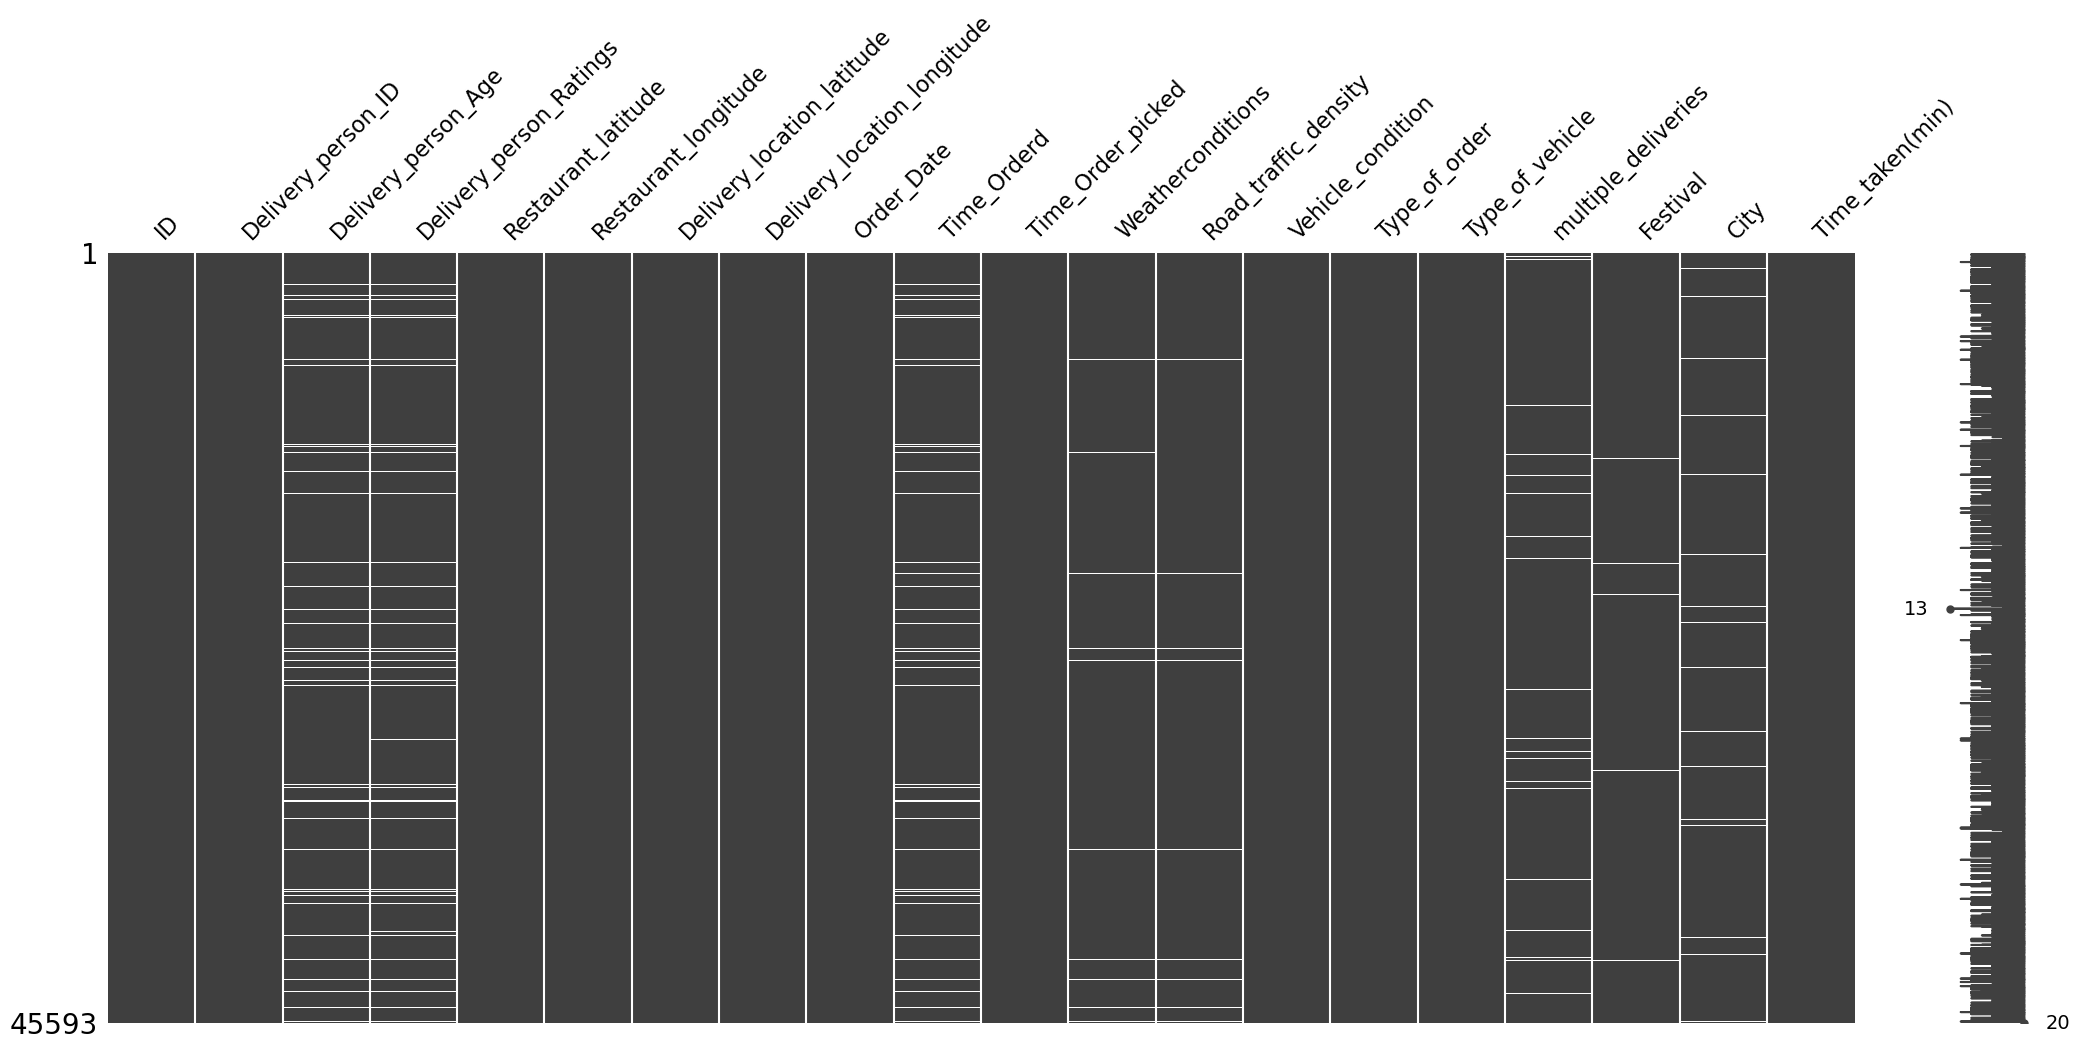

In [179]:
# Missing values matrix

msno.matrix(df);

### Count of missing values

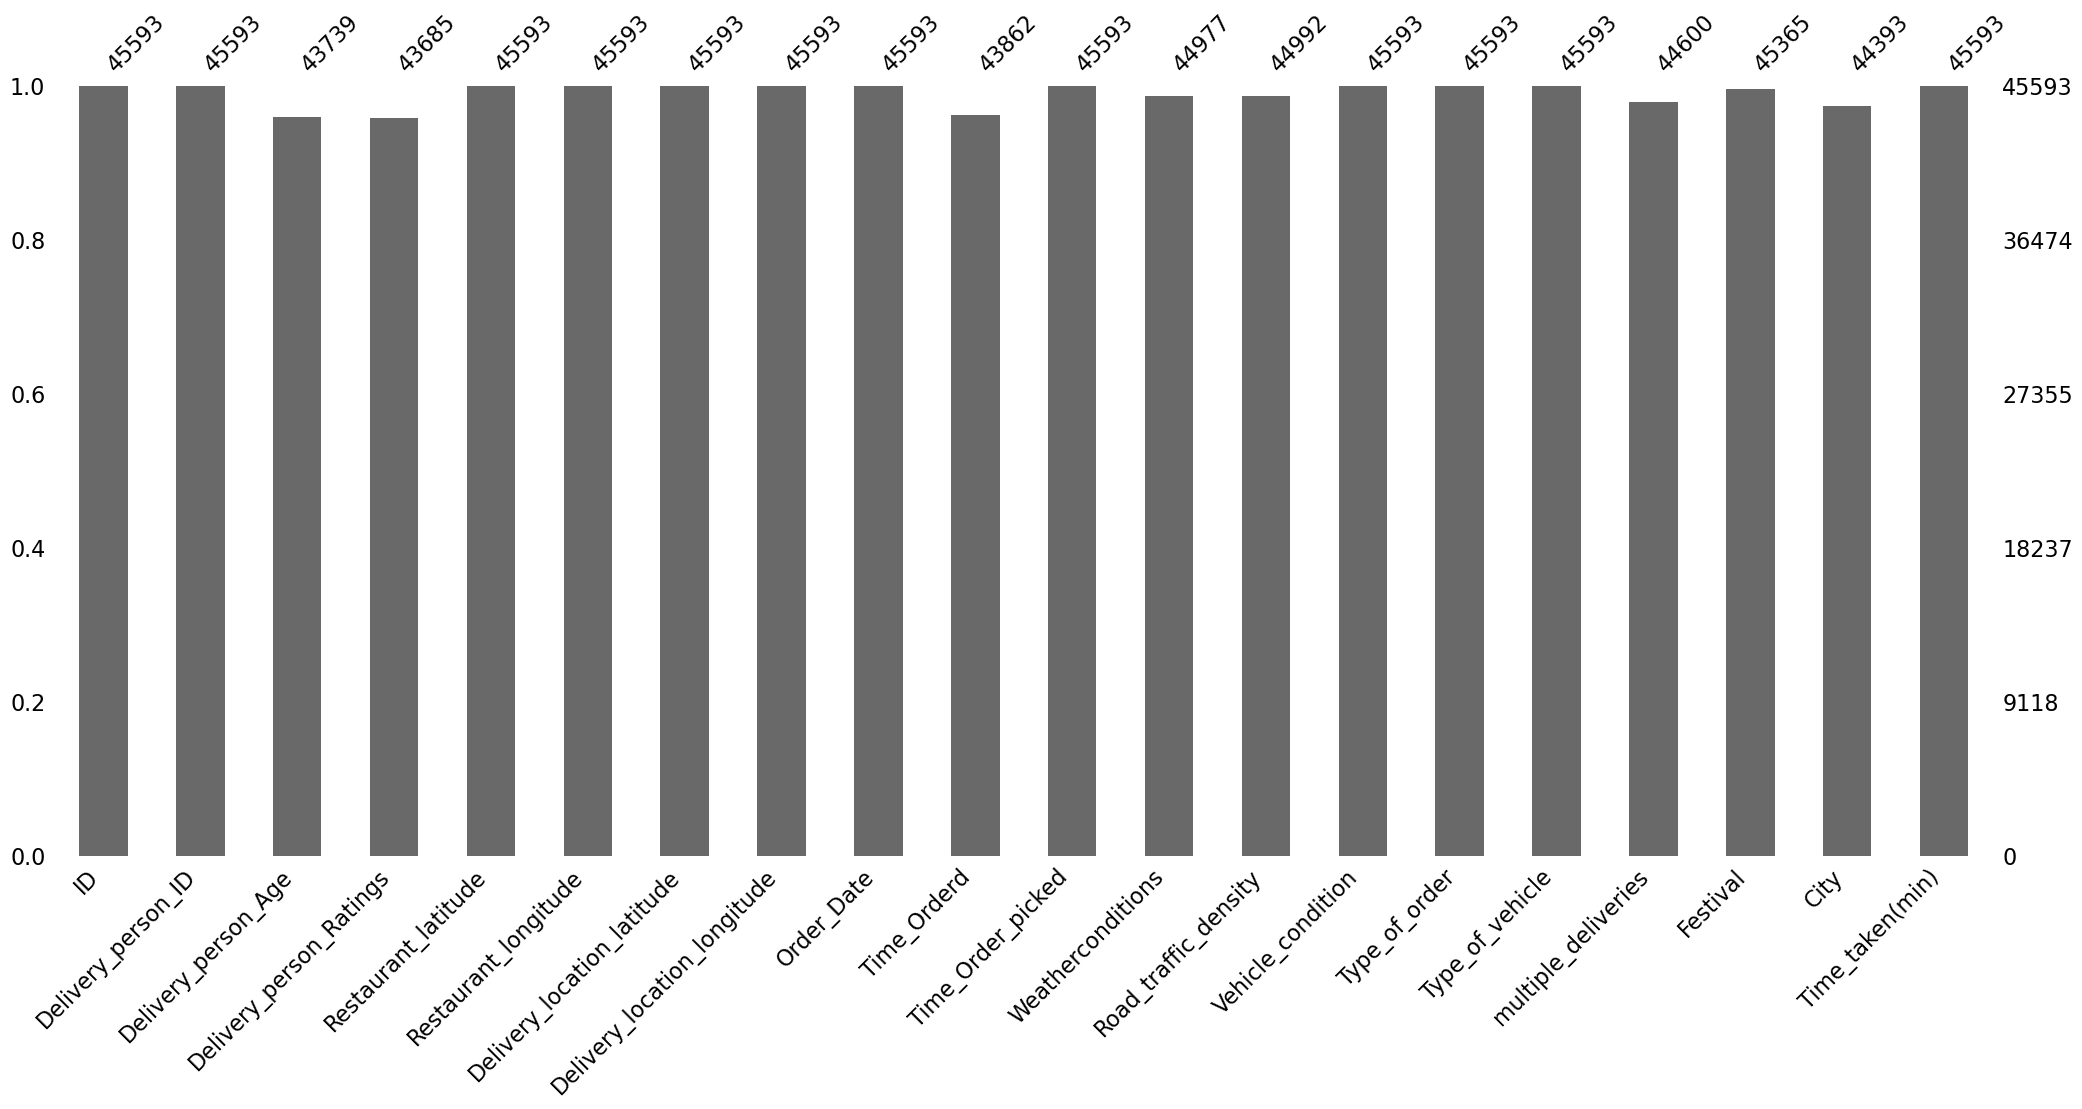

In [180]:
# Missing values bar plot

msno.bar(df);

### Correlation of missing values

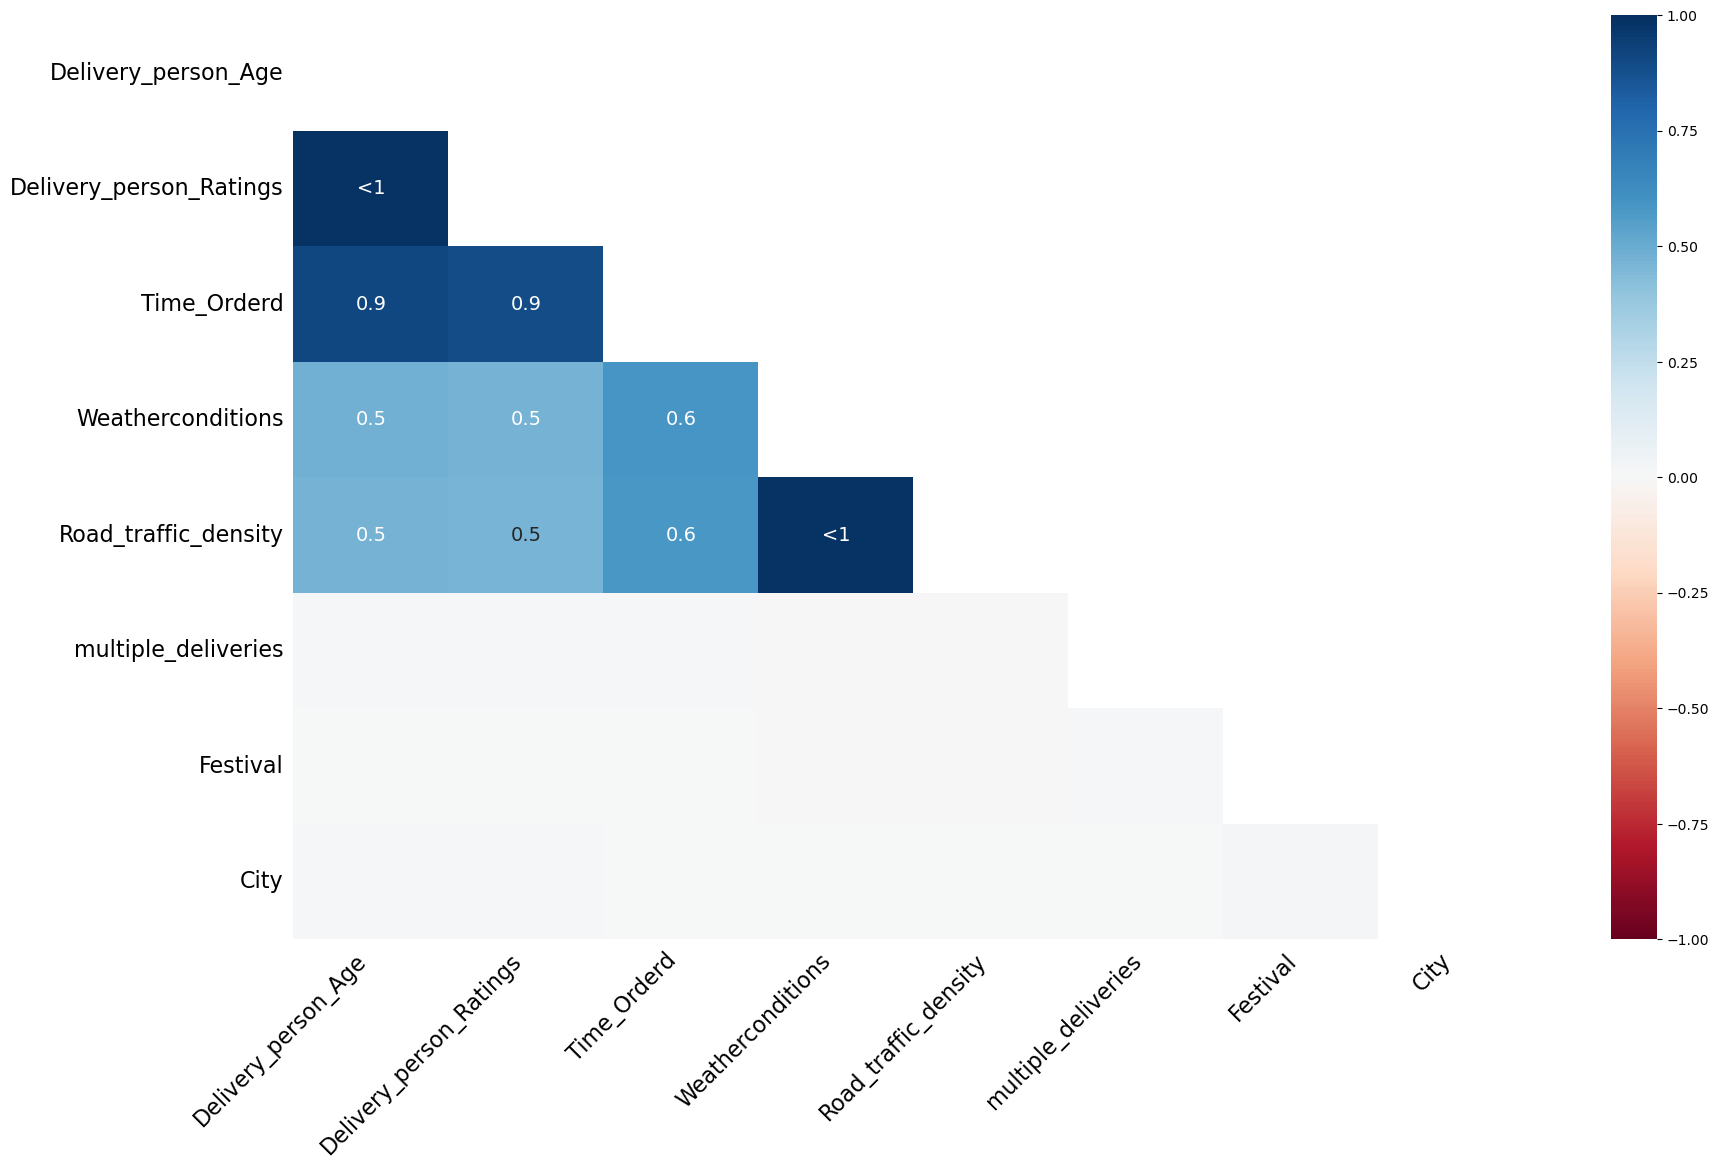

In [181]:
# Correlation heatmap of missing values

msno.heatmap(df);

**Observations:**
1. The *missingness* in the columns `Delivery_person_Age` and `Delivery_person_Ratings` are highly correlated. I will call these columns "delivery person columns".
2. The *missingness* in `Time_Ordered` is also highly correlated to the *missingness* of the delivery person columns. This might be due to some network error where the system was unable to log the delivery person details and the time of order.
3. The *missingness* of `Road_traffic_density` is highly correlated with the *missingness* of `Weatherconditions`.
4. The *missingness* of `Road_traffic_density` also shows high correlation with the *missingness* of delivery person columns. It may be because the `Road_traffic_density` may be recorded using the delivery person's phone. We need to investigate.

In [182]:
df[["Weatherconditions", "Road_traffic_density"]].isna().sum()

Weatherconditions       616
Road_traffic_density    601
dtype: int64

In [183]:
df[["Weatherconditions", "Road_traffic_density"]].isna().all(axis=1).sum()

601

In [184]:
df[["Weatherconditions", "Road_traffic_density"]].isna().all(axis=1).sum() / df[["Weatherconditions", "Road_traffic_density"]].isna().sum()

Weatherconditions       0.975649
Road_traffic_density    1.000000
dtype: float64

### Dendrogram of missing values

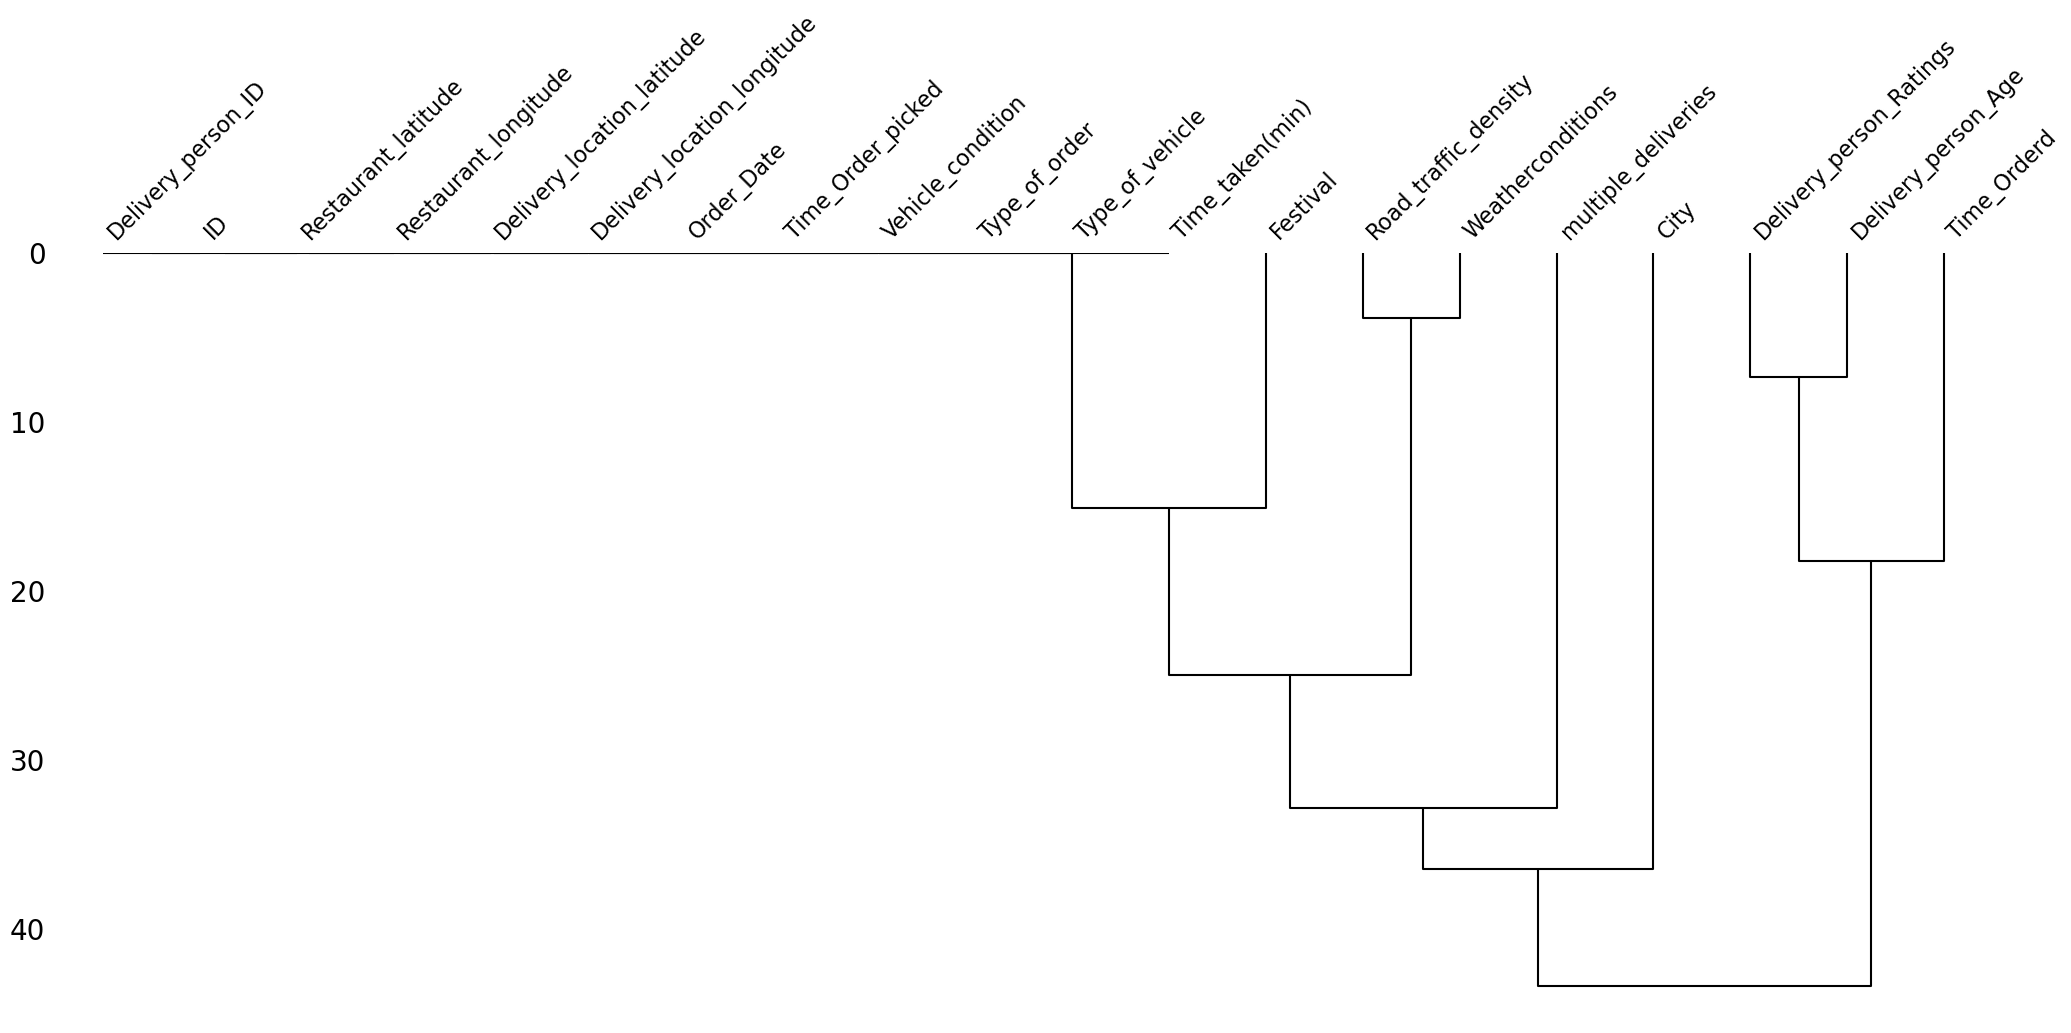

In [185]:
msno.dendrogram(df);

### Percentage of rows having missing values

In [186]:
pct = (df.isna().any(axis=1).sum() / df.shape[0]) * 100
print(f"{round(pct, 2)}% rows in the data have missing values.")

9.27% rows in the data have missing values.


# Basic Data Cleaning

Let us again read the raw data so that we can create a function to clean it.

In [187]:
df = pd.read_csv("swiggy.csv")
df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

Before we start with data cleaning, recall that all the `object`-type columns of the data have a white space in their entries. Let us first fix that.

In [188]:
df["City"].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

In [189]:
df["Road_traffic_density"].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [190]:
object_type_columns = df.select_dtypes(include=["object"]).columns
object_type_columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)'],
      dtype='object')

In [191]:
df[object_type_columns] = df[object_type_columns].map(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37                     4.9   
1  0xb379     BANGRES18DEL02                  34                     4.5   
2  0x5d6d     BANGRES19DEL01                  23                     4.4   
3  0x7a6a    COIMBRES13DEL02                  38                     4.7   
4  0x70a2     CHENRES12DEL01                  32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                 High                  2   
1      conditions Stormy                  Jam                  2   
2  conditions Sandstorms                  Low                  0   
3       conditions Sunny               Medium                  0   
4      conditions Cloudy                 High                  1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival           City  \
0         Snack      motorcycle                   0       No          Urban   
1         Snack         scooter                   1       No  Metropolitian   
2        Drinks      motorcycle                   1       No          Urban   
3        Buffet      motorcycle                   1       No  Metropolitian   
4         Snack         scooter                   1       No  Metropolitian   

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [192]:
df["City"].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', 'NaN'], dtype=object)

In [193]:
df["Road_traffic_density"].unique()

array(['High', 'Jam', 'Low', 'Medium', 'NaN'], dtype=object)

Done! Now, let us have a look at the column names.

In [194]:
df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

The column names seem too verbose. Let us rename them.

In [195]:
def change_column_names(df: pd.DataFrame):
    rename_mapping = {
        "delivery_person_id": "rider_id",
        "delivery_person_age": "age",
        "delivery_person_ratings": "ratings",
        "delivery_location_latitude": "delivery_latitude",
        "delivery_location_longitude": "delivery_longitude",
        "time_orderd": "order_time",
        "time_order_picked": "order_picked_time",
        "weatherconditions": "weather",
        "road_traffic_density": "traffic",
        "city": "city_type",
        "time_taken(min)": "time_taken"
    }
    df = df.rename(str.lower, axis=1).rename(rename_mapping, axis=1)
    return df

In [196]:
df = change_column_names(df)
df.head()

id         rider_id age ratings  restaurant_latitude  \
0  0x4607   INDORES13DEL02  37     4.9            22.745049   
1  0xb379   BANGRES18DEL02  34     4.5            12.913041   
2  0x5d6d   BANGRES19DEL01  23     4.4            12.914264   
3  0x7a6a  COIMBRES13DEL02  38     4.7            11.003669   
4  0x70a2   CHENRES12DEL01  32     4.6            12.972793   

   restaurant_longitude  delivery_latitude  delivery_longitude  order_date  \
0             75.892471          22.765049           75.912471  19-03-2022   
1             77.683237          13.043041           77.813237  25-03-2022   
2             77.678400          12.924264           77.688400  19-03-2022   
3             76.976494          11.053669           77.026494  05-04-2022   
4             80.249982          13.012793           80.289982  26-03-2022   

  order_time order_picked_time                weather traffic  \
0   11:30:00          11:45:00       conditions Sunny    High   
1   19:45:00          19:50:00      conditions Stormy     Jam   
2   08:30:00          08:45:00  conditions Sandstorms     Low   
3   18:00:00          18:10:00       conditions Sunny  Medium   
4   13:30:00          13:45:00      conditions Cloudy    High   

   vehicle_condition type_of_order type_of_vehicle multiple_deliveries  \
0                  2         Snack      motorcycle                   0   
1                  2         Snack         scooter                   1   
2                  0        Drinks      motorcycle                   1   
3                  0        Buffet      motorcycle                   1   
4                  1         Snack         scooter                   1   

  festival      city_type time_taken  
0       No          Urban   (min) 24  
1       No  Metropolitian   (min) 33  
2       No          Urban   (min) 26  
3       No  Metropolitian   (min) 21  
4       No  Metropolitian   (min) 30

Let us check if there are any duplicate rows in the data.

In [197]:
df.duplicated().sum()

0

There are no duplicate rows in the data.

## Column-wise cleaning

### `id`

In [198]:
df["id"].head()

0    0x4607
1    0xb379
2    0x5d6d
3    0x7a6a
4    0x70a2
Name: id, dtype: object

The data type of `id` is fine.

In [199]:
rows

45593

In [200]:
print(f"The number of unique IDs are {df['id'].nunique()}, and the number of rows are {rows}.")

The number of unique IDs are 45593, and the number of rows are 45593.


So, all the entries in the `id` column are unique. Hence, we may want to drop this column.

In [201]:
# df.drop(columns=["id"], inplace=True)

### `rider_id`

In [202]:
df["rider_id"].head()

0     INDORES13DEL02
1     BANGRES18DEL02
2     BANGRES19DEL01
3    COIMBRES13DEL02
4     CHENRES12DEL01
Name: rider_id, dtype: object

The data type of `rider_id` is fine.

In [203]:
print(f"The number of unique rider IDs are {df['rider_id'].nunique()}, and the number of rows are {rows}.")

The number of unique rider IDs are 1320, and the number of rows are 45593.


The data contains 1320 unique riders.

In [204]:
df["rider_id"].value_counts().head(10)

rider_id
PUNERES01DEL01      67
JAPRES11DEL02       67
HYDRES04DEL02       66
JAPRES03DEL01       66
VADRES11DEL02       66
RANCHIRES02DEL01    66
VADRES08DEL02       66
INDORES15DEL01      65
RANCHIRES02DEL02    65
BANGRES07DEL02      65
Name: count, dtype: int64

One thing to notice is that for each entry in `rider_id`, the part that comes before `"RES..."` denotes the city. So we may want to create a new column called `city_name` using `rider_id`.

In [205]:
df["rider_id"].str.split("RES").head()

0     [INDO, 13DEL02]
1     [BANG, 18DEL02]
2     [BANG, 19DEL01]
3    [COIMB, 13DEL02]
4     [CHEN, 12DEL01]
Name: rider_id, dtype: object

In [206]:
df["rider_id"].str.split("RES").str.get(0).head()

0     INDO
1     BANG
2     BANG
3    COIMB
4     CHEN
Name: rider_id, dtype: object

In [207]:
df["rider_id"].str.split("RES").str.get(0).rename("city_name").head()

0     INDO
1     BANG
2     BANG
3    COIMB
4     CHEN
Name: city_name, dtype: object

### `age`

In [208]:
df["age"].head()

0    37
1    34
2    23
3    38
4    32
Name: age, dtype: object

The data type of `age` should not be `object`. Let us convert it to `float`.

In [209]:
df["age"] = df["age"].astype("float")
df["age"].head()

0    37.0
1    34.0
2    23.0
3    38.0
4    32.0
Name: age, dtype: float64

In [210]:
df["age"].describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: age, dtype: float64

The youngest rider is of age 15, which is concerning. We can investigate further the type of transport they are using.

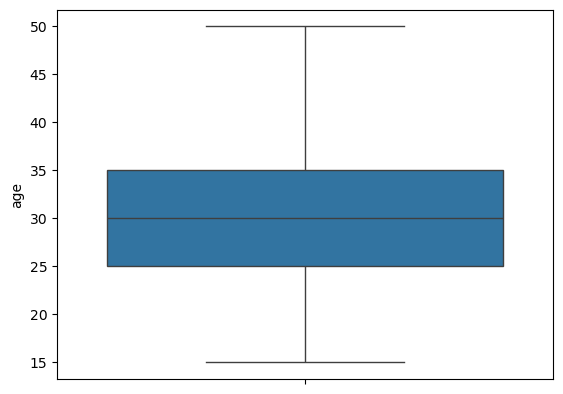

In [211]:
sns.boxplot(df["age"]);

There do not seem to be any outliers in the column `age`.

Let us now investigate all the riders of age below 18, i.e., minors.

In [212]:
minors = df.loc[df["age"] < 18]
minors

id          rider_id   age ratings  restaurant_latitude  \
2387    0x564     JAPRES15DEL03  15.0       1           -26.891191   
2905    0xcd0   INDORES010DEL03  15.0       1            22.750040   
2951    0x91a     SURRES17DEL03  15.0       1            21.149569   
5902    0x474    CHENRES15DEL03  15.0       1            13.026286   
9156    0x73f    BANGRES05DEL01  15.0       1            12.970324   
10900  0x1b49     MUMRES14DEL02  15.0       1            19.181300   
11125   0x40b     SURRES12DEL01  15.0       1           -21.183434   
12093   0x523    INDORES03DEL02  15.0       1            22.751857   
15124  0x18b0  RANCHIRES02DEL01  15.0       1             0.000000   
15927   0x550    CHENRES08DEL02  15.0       1            13.022394   
16084   0x58c     MUMRES02DEL01  15.0       1           -19.221315   
16462   0xe4c     MYSRES05DEL03  15.0       1            12.323978   
21222   0x3fc    BANGRES16DEL02  15.0       1            13.029198   
22291   0x3ed  RANCHIRES09DEL01  15.0       1           -23.351058   
23035   0x415     VADRES17DEL01  15.0       1             0.000000   
23488  0x616c     SURRES07DEL02  15.0       1            21.170798   
23644  0x1ea0    BANGRES17DEL02  15.0       1            12.972532   
23664   0x3f7    CHENRES04DEL01  15.0       1           -13.029780   
25873   0xbb3    CHENRES15DEL03  15.0       1            13.026286   
26633   0x730    INDORES15DEL02  15.0       1            22.760072   
26917   0x6e0    CHENRES06DEL03  15.0       1            13.054347   
27118   0x3f2    BANGRES02DEL02  15.0       1            12.970221   
27942   0x681    CHENRES07DEL03  15.0       1            13.081878   
28003   0x406    PUNERES14DEL01  15.0       1            18.516216   
29664  0x137e     MYSRES19DEL02  15.0       1            12.334022   
31216  0x32aa     JAPRES11DEL01  15.0       1            26.902940   
31959  0x4240    PUNERES05DEL02  15.0       1            18.543626   
33198   0x622    CHENRES03DEL02  15.0       1           -13.091809   
34953   0x85c   COIMBRES17DEL02  15.0       1            11.026117   
36021   0xdc0   COIMBRES03DEL03  15.0       1            11.025083   
37100   0x451     HYDRES14DEL03  15.0       1           -17.426228   
37676   0x424    PUNERES20DEL02  15.0       1           -18.592718   
39073   0x4a6   COIMBRES07DEL02  15.0       1           -10.961850   
39082  0x1144     MYSRES05DEL01  15.0       1            12.323978   
40285   0x442    CHENRES16DEL02  15.0       1           -13.049645   
41241   0x49c   COIMBRES14DEL02  15.0       1            11.003681   
44403  0x2314     VADRES04DEL01  15.0       1             0.000000   
44881   0x8d4    CHENRES02DEL02  15.0       1            13.086438   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
2387              75.802083          26.981191           75.892083   
2905              75.902847          22.810040           75.962847   
2951              72.772697          21.209569           72.832697   
5902              80.275235          13.056286           80.305235   
9156              77.645748          13.080324           77.755748   
10900             72.836191          19.231300           72.886191   
11125            -72.814492          21.193434           72.824492   
12093             75.866699          22.801857           75.916699   
15124              0.000000           0.070000            0.070000   
15927             80.242439          13.072394           80.292439   
16084             72.862381          19.231315           72.872381   
16462             76.627961          12.413978           76.717961   
21222             77.570997          13.159198           77.700997   
22291            -85.325731          23.421058           85.395731   
23035              0.000000           0.070000            0.070000   
23488             72.790489          21.220798           72.840489   
23644             77.608179          13.022532           77.658179   
23664            -80

**Observations:**
1. The `ratings` of all these minor riders is 1.
2. The `vehicle_condition` of them is 3, which is very bad.
3. No `weatherconditions` and `traffic` conditions available for them.
4. The `age` of all these riders is 15, which is below the permissible age to drive a vehicle. And it is surprising that there are no minors of age between 16 to 18.
5. Some of the latitude and longitude values for them are negative, which is not possible as India is to the north of the Equator and to the east of the prime meridian.

Seems like removing this data for now makes more sense than fixing it because a lot of data is missing and the entries available are faulty.

In [213]:
# rows of minors

minors_idxs = minors.index
print(minors_idxs)

Index([ 2387,  2905,  2951,  5902,  9156, 10900, 11125, 12093, 15124, 15927,
       16084, 16462, 21222, 22291, 23035, 23488, 23644, 23664, 25873, 26633,
       26917, 27118, 27942, 28003, 29664, 31216, 31959, 33198, 34953, 36021,
       37100, 37676, 39073, 39082, 40285, 41241, 44403, 44881],
      dtype='int64')


In [214]:
len(minors_idxs)

38

As these are only 38 rows, removing them won't affect the algorithm performance much. On the contrary, the performance may deteriorate if we include this data since the data is faulty. So, we may want to remove these.

In [215]:
# df = df.drop(minors_idxs)

### `ratings`

In [216]:
df["ratings"].head()

0    4.9
1    4.5
2    4.4
3    4.7
4    4.6
Name: ratings, dtype: object

The data type of `age` should not be `object`, it should be `float`. Let us convert it.

In [217]:
df["ratings"] = df["ratings"].astype(float)
df["ratings"].head()

0    4.9
1    4.5
2    4.4
3    4.7
4    4.6
Name: ratings, dtype: float64

In [218]:
df["ratings"].describe()

count    43685.000000
mean         4.633780
std          0.334716
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: ratings, dtype: float64

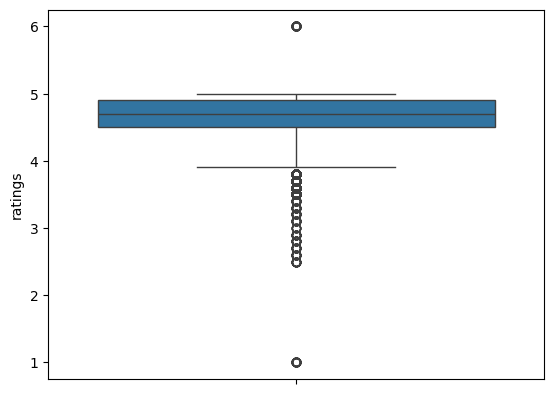

In [219]:
sns.boxplot(df["ratings"]);

**Observations:**
* Minors have 1-star ratings, which, looking at the box plot, seem like anomalies.
* The 6-star ratings are not possible. Hence, these are also anomalies.
* Both these ratings need to be investigated. If the data is problematic, then fixing or removing these rows are our options.

In [220]:
six_star_ratings = df.loc[df["ratings"] == 6]
len(six_star_ratings)

53

In [221]:
six_star_ratings

id          rider_id   age  ratings  restaurant_latitude  \
3586    0x46d    BANGRES05DEL01  50.0      6.0           -12.970324   
4714    0x493     HYDRES17DEL01  50.0      6.0           -17.451976   
5169    0x4f2     JAPRES08DEL01  50.0      6.0           -26.910262   
5362    0x430    BANGRES19DEL01  50.0      6.0            12.914264   
5651   0xbef1     AGRRES13DEL02  50.0      6.0           -27.159795   
6394    0x427     JAPRES06DEL02  50.0      6.0            26.911927   
7031    0x3eb     MYSRES15DEL02  50.0      6.0           -12.352058   
7681    0xd42     VADRES09DEL01  50.0      6.0             0.000000   
9499    0x3f0   BANGRES010DEL01  50.0      6.0            12.933298   
9535    0x3ef  RANCHIRES13DEL01  50.0      6.0           -23.374989   
10100   0x5b0     MYSRES04DEL01  50.0      6.0            12.308500   
10737  0xbffc     DEHRES18DEL02  50.0      6.0             0.000000   
12297   0x940     SURRES02DEL02  50.0      6.0            21.186608   
13257   0x490   COIMBRES03DEL02  50.0      6.0            11.025083   
13652   0x434  RANCHIRES01DEL02  50.0      6.0           -23.416792   
14106   0x3f6     MYSRES06DEL02  50.0      6.0            12.323994   
14907   0x421    CHENRES19DEL01  50.0      6.0            12.986047   
14944   0x43c     HYDRES14DEL01  50.0      6.0            17.426228   
16798   0x3fa  RANCHIRES06DEL02  50.0      6.0            23.357804   
17145   0x400   COIMBRES07DEL01  50.0      6.0            10.961850   
17708   0x412   CHENRES010DEL01  50.0      6.0           -13.066762   
18977  0xc363     BHPRES08DEL03  50.0      6.0            23.232537   
19382   0x3fb    INDORES02DEL03  50.0      6.0           -22.651847   
20269  0xd0bc     ALHRES01DEL02  50.0      6.0            25.454648   
21320   0x810     HYDRES06DEL01  50.0      6.0            17.455894   
22416  0xc7d6     ALHRES08DEL03  50.0      6.0            25.450329   
23375  0x1060    BANGRES05DEL03  50.0      6.0            12.970324   
24237   0x420     SURRES13DEL01  50.0      6.0           -21.170096   
24918  0xbf34     KNPRES16DEL02  50.0      6.0            26.482581   
25285   0x40c   COIMBRES08DEL03  50.0      6.0            11.001852   
26052   0x694  RANCHIRES09DEL02  50.0      6.0            23.351058   
27221   0x3f4   COIMBRES20DEL02  50.0      6.0           -10.994136   
27399   0x3ea     MUMRES20DEL03  50.0      6.0            19.103249   
28315   0x3fd    BANGRES13DEL01  50.0      6.0           -12.935662   
28974   0x404    CHENRES04DEL01  50.0      6.0           -13.029780   
29535   0x480    BANGRES15DEL01  50.0      6.0           -12.975377   
30579  0xbf12     BHPRES20DEL03  50.0      6.0            23.235123   
30943   0x4cc     MUMRES20DEL01  50.0      6.0           -19.103249   
31233   0x706     VADRES09DEL02  50.0      6.0             0.000000   
32326  0xbf33     KNPRES03DEL03  50.0      6.0           -26.469003   
33533  0xbf01     KOLRES06DEL02  50.0      6.0           -22.533662   
34688  0xbf76     AGRRES20DEL03  50.0      6.0           -27.158822   
38007  0xbef2     DEHRES13DEL01  50.0      6.0            30.366322   
38020   0x466    CHENRES14DEL02  50.0      6.0            13.026279   
38561   0x3f1     VADRES09DEL03  50.0      6.0             0.000000   
38649   0x5e0     MUMRES07DEL03  50.0      6.0           -19.091458   
39699   0xa24  RANCHIRES14DEL03  50.0      6.0             0.000000   
40223   0x3e9     MYSRES04DEL03  50.0      6.0           -12.308500   
41105   0x4e4     VADRES17DEL01  50.0      6.0             0.000000   
41969  0xbef4     KNPRES19DEL03  50.0      6.0           -26.490950   
42072   0x5fc    INDORES11DEL03  50.0      6.0            22.751234   
42835   0x53e    BANGRES12DEL01  50.0      6.0           -12.939496   
45332  0x2950     VADRES04DEL02  50.0      6.0             0.000000   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
3586             -77.645748          13.010324           77.685748   
4714             -78.385883         

These rows also have problems like some of the latitude and longitude values being negative, no values available for `order_time`, `weather`, and `traffic`. So we may want to remove these too.

In [222]:
six_star_ratings_idxs = six_star_ratings.index
print(six_star_ratings_idxs)

Index([ 3586,  4714,  5169,  5362,  5651,  6394,  7031,  7681,  9499,  9535,
       10100, 10737, 12297, 13257, 13652, 14106, 14907, 14944, 16798, 17145,
       17708, 18977, 19382, 20269, 21320, 22416, 23375, 24237, 24918, 25285,
       26052, 27221, 27399, 28315, 28974, 29535, 30579, 30943, 31233, 32326,
       33533, 34688, 38007, 38020, 38561, 38649, 39699, 40223, 41105, 41969,
       42072, 42835, 45332],
      dtype='int64')


In [223]:
len(six_star_ratings_idxs)

53

### `restaurant_latitude`, `restaurant_longitude`, `delivery_latitude`, and `delivery_longitude`

In [224]:
location_columns = df.columns[4:8]
print(location_columns)

Index(['restaurant_latitude', 'restaurant_longitude', 'delivery_latitude',
       'delivery_longitude'],
      dtype='object')


Let us first check their data types.

In [225]:
for col in location_columns:
    print(f"The dtype of '{col}' is {df[col].dtype}.")

The dtype of 'restaurant_latitude' is float64.
The dtype of 'restaurant_longitude' is float64.
The dtype of 'delivery_latitude' is float64.
The dtype of 'delivery_longitude' is float64.


Their data types are fine.

In [226]:
location_subset = df.loc[:, location_columns]
location_subset.head()

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0            22.745049             75.892471          22.765049   
1            12.913041             77.683237          13.043041   
2            12.914264             77.678400          12.924264   
3            11.003669             76.976494          11.053669   
4            12.972793             80.249982          13.012793   

   delivery_longitude  
0           75.912471  
1           77.813237  
2           77.688400  
3           77.026494  
4           80.289982

In [227]:
location_subset.describe()

restaurant_latitude  restaurant_longitude  delivery_latitude  \
count         45593.000000          45593.000000       45593.000000   
mean             17.017729             70.231332          17.465186   
std               8.185109             22.883647           7.335122   
min             -30.905562            -88.366217           0.010000   
25%              12.933284             73.170000          12.988453   
50%              18.546947             75.898497          18.633934   
75%              22.728163             78.044095          22.785049   
max              30.914057             88.433452          31.054057   

       delivery_longitude  
count        45593.000000  
mean            70.845702  
std             21.118812  
min              0.010000  
25%             73.280000  
50%             76.002574  
75%             78.107044  
max             88.563452

As India lies to the north of equator between 6° 44′ N to `35° 30′ N, and between 68° 7′ E to 97° 25′ E, the valid values of latitudes and longitudes are only the ones that fall in this range. So, there are some faulty values of latitudes and longitudes in the data. We can see that only the values near the minimum are faulty. The maximum values already lie in the required range.

In [228]:
lower_bound_lat = 6.44
lower_bound_long = 68.70

In [229]:
incorrect_locations = df.loc[
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long) |
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long)
]

len(incorrect_locations)

4071

There are 4071 rows with such incorrect location columns. Let us have a look at them.

In [230]:
incorrect_locations.sample(50)

id          rider_id   age  ratings  restaurant_latitude  \
23981  0xdc7c    AURGRES20DEL03  33.0      4.3             0.000000   
39374  0xd570     GOARES05DEL02  30.0      4.6             0.000000   
17168  0xe0f9     DEHRES11DEL01  34.0      4.9             0.000000   
26294  0xa2ea     VADRES15DEL02  36.0      4.7             0.000000   
34070   0x496    CHENRES07DEL01   NaN      NaN           -13.081878   
25924   0x593     JAPRES13DEL02   NaN      NaN           -26.846156   
29062  0x9e0e     VADRES04DEL02  37.0      5.0             0.000000   
19595  0x3df6     VADRES15DEL03  27.0      4.6             0.000000   
7061   0xc983     DEHRES12DEL01  21.0      4.6             0.000000   
38421  0xb3b2     VADRES07DEL01  34.0      4.6             0.000000   
45384  0xd3f2     ALHRES06DEL02  21.0      5.0             0.000000   
5543   0xbf0f     DEHRES19DEL01   NaN      NaN           -30.372202   
8488    0x7db  RANCHIRES12DEL01  20.0      4.7             0.000000   
25886  0x6079     VADRES09DEL01  36.0      4.6             0.000000   
39702  0x92ea     VADRES09DEL02  30.0      4.8             0.000000   
42452  0xc625     AGRRES09DEL01  38.0      4.4             0.000000   
27018   0x548    VADRES010DEL01   NaN      NaN           -22.310329   
8774   0x2dca  RANCHIRES14DEL03  29.0      5.0             0.000000   
21345  0x1e36     VADRES17DEL03  29.0      4.5             0.000000   
5382   0xad4c     VADRES16DEL01  39.0      4.9             0.000000   
33615  0x7cd2     VADRES18DEL01  34.0      3.7             0.000000   
17349  0x55eb     VADRES04DEL01  24.0      4.6             0.000000   
10511  0xc857     DEHRES01DEL03  35.0      4.7             0.000000   
19406  0xda37     DEHRES20DEL03  32.0      4.8             0.000000   
40173  0xd2ff     AGRRES16DEL01  38.0      4.4             0.000000   
2417   0xe047     BHPRES07DEL01  39.0      4.9             0.000000   
9411    0x40f    INDORES09DEL03   NaN      NaN           -22.725835   
5581   0xd52c     BHPRES12DEL03  31.0      4.3             0.000000   
45037  0x4ae9     VADRES09DEL02  31.0      4.7             0.000000   
13538  0x548a  RANCHIRES12DEL02  35.0      4.7             0.000000   
11301  0x6c2a     VADRES16DEL03  37.0      4.6             0.000000   
41091   0x51f     MYSRES13DEL03   NaN      NaN           -12.310972   
36325  0xc883     AGRRES16DEL01  39.0      4.6             0.000000   
29084  0xba6c     VADRES16DEL02  29.0      4.5             0.000000   
33843  0xcb02     GOARES19DEL02  36.0      4.7             0.000000   
36911  0x5de8     MYSRES14DEL01  22.0      5.0             0.000000   
33932  0xc039     AGRRES03DEL01  29.0      4.7           -27.160832   
24245  0xccdf     BHPRES09DEL02  34.0      4.7             0.000000   
41613  0xc078    KOLRES010DEL03  30.0      4.7           -22.538999   
20060  0x1a71     VADRES09DEL01  24.0      4.8             0.000000   
28584  0xdfb3     ALHRES11DEL01  34.0      4.9             0.000000   
37810  0xc9fb     KNPRES06DEL01  31.0      4.7             0.000000   
26806  0x141f     VADRES08DEL03  28.0      4.9             0.000000   
43778  0x8989  RANCHIRES03DEL03  39.0      5.0             0.000000   
9833   0x55f0  RANCHIRES02DEL01  30.0      4.7             0.000000   
43182  0x9eb8     VADRES15DEL01  20.0      4.9             0.000000   
9516   0xc4cf     AGRRES15DEL03  27.0      4.6             0.000000   
10435  0xd4ef     AGRRES15DEL02  38.0      4.8             0.000000   
10228  0xc060     KNPRES07DEL02  30.0      4.6           -26.472001   
14066  0x8cc6     VADRES17DEL01  33.0      4.9             0.000000   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
23981              0.000000           0.060000            0.060000   
39374              0.000000           0.080000            0.080000   
17168              0.000000           0.010000            0.010000   
26294              0.000000           0.020000            0.020000   
34070            -80.248519          13

In [231]:
incorrect_locations_subset = incorrect_locations.loc[:, location_columns]
incorrect_locations_subset.head()

restaurant_latitude  restaurant_longitude  delivery_latitude  \
33                  0.0                   0.0               0.11   
52                  0.0                   0.0               0.03   
57                  0.0                   0.0               0.08   
59                  0.0                   0.0               0.06   
67                  0.0                   0.0               0.02   

    delivery_longitude  
33                0.11  
52                0.03  
57                0.08  
59                0.06  
67                0.02

In [232]:
incorrect_locations_subset.describe()

restaurant_latitude  restaurant_longitude  delivery_latitude  \
count          4071.000000           4071.000000        4071.000000   
mean             -2.149416              2.068601           2.212538   
std               6.537913             25.270676           6.538283   
min             -30.905562            -88.366217           0.010000   
25%               0.000000              0.000000           0.040000   
50%               0.000000              0.000000           0.070000   
75%               0.000000              0.000000           0.110000   
max               0.000000             88.433452          31.045562   

       delivery_longitude  
count         4071.000000  
mean             8.299885  
std             23.980011  
min              0.010000  
25%              0.040000  
50%              0.070000  
75%              0.110000  
max             88.523452

The maximum value of incorrect `restaurant_latitude` is 0. The maximum of the rest of incorrect location columns seem okay and inside the acceptable bound. The minimum of all these incorrect location columns are problematic. Let us plot a box plot to visualize this better.

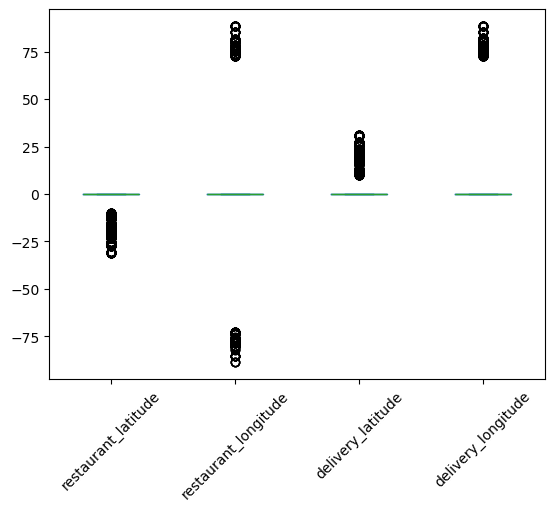

In [233]:
incorrect_locations_subset.plot(kind="box")
plt.xticks(rotation=45)
plt.show();

Looking at the box plot, it seems that the negative values may be incorrect only because of their signs. If they were positive, they would lie in the required range. There are also zeros in them, which we can handle later. One way of handling the zeros is to replace them with `np.NaN`, and then impute them with advanced imputation techniques that use the remaining columns.

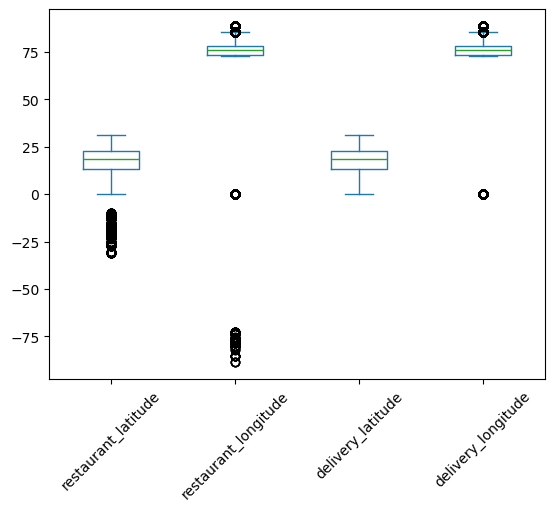

In [234]:
# Before taking the absolute value

location_subset.plot(kind="box")
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

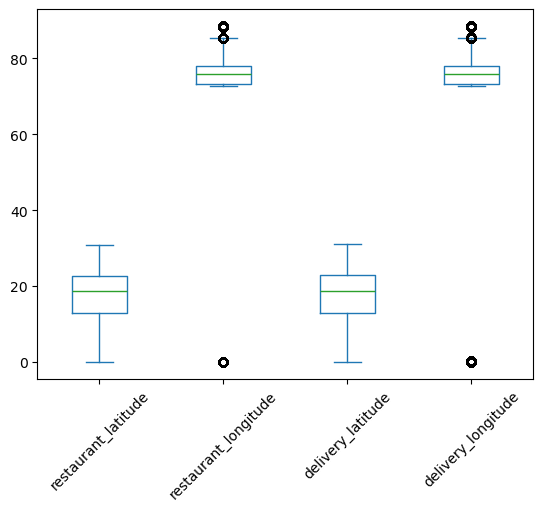

In [235]:
# After taking the absolute value

location_subset_abs = location_subset.abs()

location_subset_abs.plot(kind="box")
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Again, we still need to handle the zeros. Rather, we still need to check whether this has values outside the geographical bound of India. Let us do that now.

In [236]:
incorrect_locations_subset_abs = location_subset_abs.loc[
    (location_subset_abs['restaurant_latitude'] < lower_bound_lat) |
    (location_subset_abs['restaurant_longitude'] < lower_bound_long) |
    (location_subset_abs['delivery_latitude'] < lower_bound_lat) |
    (location_subset_abs['delivery_longitude'] < lower_bound_long)
]

len(incorrect_locations_subset_abs)

3640

There are 3,640 values still outside the bound. Let us see how they look.

In [237]:
incorrect_locations_subset_abs.sample(50)

restaurant_latitude  restaurant_longitude  delivery_latitude  \
31626                  0.0                   0.0               0.06   
12514                  0.0                   0.0               0.05   
39909                  0.0                   0.0               0.04   
35769                  0.0                   0.0               0.11   
20105                  0.0                   0.0               0.02   
10437                  0.0                   0.0               0.06   
10585                  0.0                   0.0               0.05   
27095                  0.0                   0.0               0.08   
33201                  0.0                   0.0               0.09   
43404                  0.0                   0.0               0.07   
4015                   0.0                   0.0               0.07   
468                    0.0                   0.0               0.01   
9721                   0.0                   0.0               0.01   
28647                  0.0                   0.0               0.09   
44572                  0.0                   0.0               0.07   
10081                  0.0                   0.0               0.08   
216                    0.0                   0.0               0.06   
23835                  0.0                   0.0               0.13   
34888                  0.0                   0.0               0.03   
35034                  0.0                   0.0               0.06   
38235                  0.0                   0.0               0.13   
10136                  0.0                   0.0               0.07   
11207                  0.0                   0.0               0.06   
45569                  0.0                   0.0               0.07   
2319                   0.0                   0.0               0.11   
34291                  0.0                   0.0               0.08   
31420                  0.0                   0.0               0.13   
10638                  0.0                   0.0               0.02   
34245                  0.0                   0.0               0.07   
37709                  0.0                   0.0               0.13   
31026                  0.0                   0.0               0.13   
41111                  0.0                   0.0               0.05   
40984                  0.0                   0.0               0.02   
16361                  0.0                   0.0               0.06   
33381                  0.0                   0.0               0.07   
5194                   0.0                   0.0               0.03   
33576                  0.0                   0.0               0.08   
34599                  0.0                   0.0               0.08   
3122                   0.0                   0.0               0.02   
26279                  0.0                   0.0               0.02   
37772                  0.0                   0.0               0.13   
9270                   0.0                   0.0               0.07   
13723                  0.0                   0.0               0.11   
40533                  0.0                   0.0               0.02   
20060                  0.0                   0.0               0.01   
314                    0.0                   0.0               0.03   
38087                  0.0                   0.0               0.08   
21934                  0.0                   0.0               0.11   
7808                   0.0                   0.0               0.05   
43246                  0.0                   0.0               0.13   

       delivery_longitude  
31626                0.06  
12514                0.05  
39909                0.04  
35769                0.11  
20105                0.02  
10437                0.06  
10585                0.05  
27095                0.08  
33201                0.09  
43404                0.07  
4015                 0.07  
468                  0.01  
9721                 

It looks like all these problematic latitudes and longitudes have a value of < 1. Let us check this.

In [238]:
incorrect_locations_subset_abs_check = location_subset_abs.loc[
    (location_subset_abs['restaurant_latitude'] < 1) |
    (location_subset_abs['restaurant_longitude'] < 1) |
    (location_subset_abs['delivery_latitude'] < 1) |
    (location_subset_abs['delivery_longitude'] < 1)
]

len(incorrect_locations_subset_abs_check)

3640

Yes! Knowing this, we can easily target these problematic rows now using a simple function.

In [239]:
def clean_lat_lon(df: pd.DataFrame, threshold=1):
    df = df.copy()
    location_columns = df.columns[4:8]
    df[location_columns] = df[location_columns].abs()
    df[location_columns] = df[location_columns].map(lambda x: x if x >= threshold else np.nan)
    return df

In [240]:
clean_lat_lon(df).isna().sum()

id                         0
rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3640
restaurant_longitude    3640
delivery_latitude       3640
delivery_longitude      3640
order_date                 0
order_time                 0
order_picked_time          0
weather                    0
traffic                    0
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries        0
festival                   0
city_type                  0
time_taken                 0
dtype: int64

As we can see, all the 3,640 problematic values were filled with `np.nan`.

### `order_date`

In [241]:
df["order_date"].head()

0    19-03-2022
1    25-03-2022
2    19-03-2022
3    05-04-2022
4    26-03-2022
Name: order_date, dtype: object

It is a date-time column, hence we will need to convert it first.

In [242]:
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=True)
df["order_date"].head()

0   2022-03-19
1   2022-03-25
2   2022-03-19
3   2022-04-05
4   2022-03-26
Name: order_date, dtype: datetime64[ns]

In [243]:
df["order_date"].isna().sum()

0

As seen earlier has well, the column `order_date` does not have any missing values.

In [244]:
df["order_date"].max() - df["order_date"].min()

Timedelta('54 days 00:00:00')

So we have 54 days of data. Let us check what is the first and the last date.

In [245]:
df["order_date"].agg(["min", "max"]).set_axis(["start", "end"], axis=0)

start   2022-02-11
end     2022-04-06
Name: order_date, dtype: datetime64[ns]

Let us create a function and extract some date-time features from this column.

In [246]:
def extract_datetime_features(series: pd.Series):
    date_col = pd.to_datetime(series, dayfirst=True)
    data = {
        "day": date_col.dt.day,
        "month": date_col.dt.month,
        "year": date_col.dt.year,
        "day_of_week": date_col.dt.day_name(),
        "is_weekend": date_col.dt.day_name().isin(["Saturday", "Sunday"]).astype(int)
    }
    df = pd.DataFrame(data)
    return df

In [247]:
extract_datetime_features(df["order_date"]).head(5)

day  month  year day_of_week  is_weekend
0   19      3  2022    Saturday           1
1   25      3  2022      Friday           0
2   19      3  2022    Saturday           1
3    5      4  2022     Tuesday           0
4   26      3  2022    Saturday           1

In [248]:
extract_datetime_features(df["order_date"]).tail(3)

day  month  year day_of_week  is_weekend
45590   11      3  2022      Friday           0
45591    7      3  2022      Monday           0
45592    2      3  2022   Wednesday           0

As the year for all the rows is the same, we won't consider this column in our final cleaned data.

### `order_time` and `order_picked_time`

In [249]:
df["order_time"].head()

0    11:30:00
1    19:45:00
2    08:30:00
3    18:00:00
4    13:30:00
Name: order_time, dtype: object

In [250]:
df["order_picked_time"].head()

0    11:45:00
1    19:50:00
2    08:45:00
3    18:10:00
4    13:45:00
Name: order_picked_time, dtype: object

We again need to convert these both to date-time and extract some information.

In [251]:
order_time_hr = pd.to_datetime(df["order_time"], format="%H:%M:%S").dt.hour
order_time_hr.head()

0    11.0
1    19.0
2     8.0
3    18.0
4    13.0
Name: order_time, dtype: float64

Let us create a function which calculates the time of the day, i.e., morning, afternoon, evening, or night, given a time.

In [252]:
def extract_time_of_day(series: pd.Series):
    hr = pd.to_datetime(series, format="%H:%M:%S", errors="coerce").dt.hour
    condlist = [
        (hr.between(6, 12, inclusive="left")),
        (hr.between(12, 17, inclusive="left")),
        (hr.between(17, 20, inclusive="left")),
        (hr.between(20, 24, inclusive="left")),
    ]
    choicelist = ["morning", "afternoon", "evening", "night"]
    default = "after_midnight"
    time_of_day_info = pd.Series(np.select(condlist, choicelist, default=default), index=series.index)
    return time_of_day_info.where(series.notna(), np.nan)

In [253]:
time_subset = df.loc[:, ["order_time", "order_picked_time"]]
time_subset.head()

order_time order_picked_time
0   11:30:00          11:45:00
1   19:45:00          19:50:00
2   08:30:00          08:45:00
3   18:00:00          18:10:00
4   13:30:00          13:45:00

In [254]:
time_subset.dtypes

order_time           object
order_picked_time    object
dtype: object

In [255]:
time_columns = time_subset.columns
time_columns

Index(['order_time', 'order_picked_time'], dtype='object')

In [256]:
time_subset.head()

order_time order_picked_time
0   11:30:00          11:45:00
1   19:45:00          19:50:00
2   08:30:00          08:45:00
3   18:00:00          18:10:00
4   13:30:00          13:45:00

In [257]:
time_subset.isna().sum()

order_time           0
order_picked_time    0
dtype: int64

In [258]:
time_subset.replace("NaN", np.nan, inplace=True)
time_subset.isna().sum()

order_time           1731
order_picked_time       0
dtype: int64

In [259]:
time_subset.dropna(inplace=True)
time_subset.isna().sum()

order_time           0
order_picked_time    0
dtype: int64

In [260]:
extract_time_of_day(time_subset["order_time"])

0               morning
1               evening
2               morning
3               evening
4             afternoon
5                 night
6               evening
7               evening
8                 night
9                 night
10            afternoon
11              evening
12              morning
13              evening
14                night
15            afternoon
16                night
17                night
18                night
19                night
20                night
21              morning
22              evening
23            afternoon
24              evening
25                night
26                night
27                night
28                night
29                night
30                night
31                night
32            afternoon
33                night
34                night
35              evening
36            afternoon
37              morning
38              morning
39              morning
40                night
41              

In [261]:
extract_time_of_day(time_subset["order_picked_time"])

0               morning
1               evening
2               morning
3               evening
4             afternoon
5                 night
6               evening
7               evening
8                 night
9                 night
10            afternoon
11              evening
12              morning
13                night
14                night
15            afternoon
16                night
17                night
18                night
19                night
20                night
21              morning
22              evening
23            afternoon
24              evening
25                night
26                night
27                night
28                night
29                night
30                night
31                night
32            afternoon
33                night
34                night
35              evening
36            afternoon
37              morning
38              morning
39              morning
40                night
41              

In [262]:
(pd.to_datetime(time_subset["order_picked_time"], format="%H:%M:%S") - pd.to_datetime(time_subset["order_time"], format="%H:%M:%S")).head()

0   0 days 00:15:00
1   0 days 00:05:00
2   0 days 00:15:00
3   0 days 00:10:00
4   0 days 00:15:00
dtype: timedelta64[ns]

In [263]:
(pd.to_datetime(time_subset["order_picked_time"], format="%H:%M:%S") - pd.to_datetime(time_subset["order_time"], format="%H:%M:%S")).dt.seconds.head()

0    900
1    300
2    900
3    600
4    900
dtype: int32

In [264]:
((pd.to_datetime(time_subset["order_picked_time"], format="%H:%M:%S") - pd.to_datetime(time_subset["order_time"], format="%H:%M:%S")).dt.seconds / 60).head()

0    15.0
1     5.0
2    15.0
3    10.0
4    15.0
dtype: float64

In [265]:
time_subset["pickup_time"] = (pd.to_datetime(time_subset["order_picked_time"], format="%H:%M:%S") - pd.to_datetime(time_subset["order_time"], format="%H:%M:%S")).dt.seconds / 60
time_subset.head()

order_time order_picked_time  pickup_time
0   11:30:00          11:45:00         15.0
1   19:45:00          19:50:00          5.0
2   08:30:00          08:45:00         15.0
3   18:00:00          18:10:00         10.0
4   13:30:00          13:45:00         15.0

In [266]:
pd.to_datetime(time_subset["order_time"], format="%H:%M:%S").dt.hour.head()

0    11
1    19
2     8
3    18
4    13
Name: order_time, dtype: int32

In [267]:
time_subset["order_time_hour"] = pd.to_datetime(time_subset["order_time"], format="%H:%M:%S").dt.hour
time_subset.head()

order_time order_picked_time  pickup_time  order_time_hour
0   11:30:00          11:45:00         15.0               11
1   19:45:00          19:50:00          5.0               19
2   08:30:00          08:45:00         15.0                8
3   18:00:00          18:10:00         10.0               18
4   13:30:00          13:45:00         15.0               13

In [268]:
time_subset["order_time_of_day"] = extract_time_of_day(time_subset["order_time"])
time_subset.head()

order_time order_picked_time  pickup_time  order_time_hour order_time_of_day
0   11:30:00          11:45:00         15.0               11           morning
1   19:45:00          19:50:00          5.0               19           evening
2   08:30:00          08:45:00         15.0                8           morning
3   18:00:00          18:10:00         10.0               18           evening
4   13:30:00          13:45:00         15.0               13         afternoon

In [269]:
time_subset.drop(columns=["order_time", "order_picked_time"], inplace=True)
time_subset.head()

pickup_time  order_time_hour order_time_of_day
0         15.0               11           morning
1          5.0               19           evening
2         15.0                8           morning
3         10.0               18           evening
4         15.0               13         afternoon

### `weather`

In [270]:
df["weather"].head()

0         conditions Sunny
1        conditions Stormy
2    conditions Sandstorms
3         conditions Sunny
4        conditions Cloudy
Name: weather, dtype: object

The data type of `weather` is fine. Let us check how many categories it has.

In [271]:
df["weather"].value_counts()

weather
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

In [272]:
df["weather"].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

One thing we can do is remove the string `"conditions "` from all the categories as it is redundant.

In [273]:
df["weather"] = df["weather"].str.replace("conditions ", "")
df["weather"].head()

0         Sunny
1        Stormy
2    Sandstorms
3         Sunny
4        Cloudy
Name: weather, dtype: object

In [274]:
df["weather"].value_counts()

weather
Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
NaN            616
Name: count, dtype: int64

In [275]:
df["weather"].isna().sum()

0

In [276]:
df["weather"].replace("NaN", np.nan).isna().sum()

616

### `traffic`

In [277]:
df["traffic"].head()

0      High
1       Jam
2       Low
3    Medium
4      High
Name: traffic, dtype: object

The data type seems fine. Let us check how many categories it has.

In [278]:
df["traffic"].value_counts()

traffic
Low       15477
Jam       14143
Medium    10947
High       4425
NaN         601
Name: count, dtype: int64

In [279]:
df["traffic"].unique()

array(['High', 'Jam', 'Low', 'Medium', 'NaN'], dtype=object)

### `vehicle_condition`

In [280]:
df["vehicle_condition"].head()

0    2
1    2
2    0
3    0
4    1
Name: vehicle_condition, dtype: int64

The data type is fine. Let us see if this has only a few values.

In [281]:
df["vehicle_condition"].value_counts()

vehicle_condition
2    15034
1    15030
0    15009
3      520
Name: count, dtype: int64

Yes it takes only 4 values. It also does not have any missing values.

### `type_of_order`

In [282]:
df["type_of_order"].head()

0     Snack
1     Snack
2    Drinks
3    Buffet
4     Snack
Name: type_of_order, dtype: object

The data type is fine. Let us check how many categories it has.

In [283]:
df["type_of_order"].value_counts()

type_of_order
Snack     11533
Meal      11458
Drinks    11322
Buffet    11280
Name: count, dtype: int64

In [284]:
df["type_of_order"].unique()

array(['Snack', 'Drinks', 'Buffet', 'Meal'], dtype=object)

One good thing to notice is that it does not have any missing values.

### `type_of_vehicle`

In [285]:
df["type_of_vehicle"].head()

0    motorcycle
1       scooter
2    motorcycle
3    motorcycle
4       scooter
Name: type_of_vehicle, dtype: object

The data type is fine. Let us check how many categories does it have.

In [286]:
df["type_of_vehicle"].value_counts()

type_of_vehicle
motorcycle          26435
scooter             15276
electric_scooter     3814
bicycle                68
Name: count, dtype: int64

In [287]:
df["type_of_vehicle"].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

Very few instances of `bicycle`. Also, no missing values.

### `multiple_deliveries`

In [288]:
df["multiple_deliveries"].head()

0    0
1    1
2    1
3    1
4    1
Name: multiple_deliveries, dtype: object

In [289]:
df["multiple_deliveries"].value_counts()

multiple_deliveries
1      28159
0      14095
2       1985
NaN      993
3        361
Name: count, dtype: int64

In [290]:
df["multiple_deliveries"].unique()

array(['0', '1', '3', 'NaN', '2'], dtype=object)

The data type should be numerical.

In [291]:
df["multiple_deliveries"] = df["multiple_deliveries"].astype(float)
df["multiple_deliveries"].head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: multiple_deliveries, dtype: float64

In [292]:
df["multiple_deliveries"].isna().sum()

993

In [293]:
df["multiple_deliveries"].unique()

array([ 0.,  1.,  3., nan,  2.])

### `festival`

In [294]:
df["festival"].head()

0    No
1    No
2    No
3    No
4    No
Name: festival, dtype: object

The data type is fine. Let us check the number of categories.

In [295]:
df["festival"].value_counts()

festival
No     44469
Yes      896
NaN      228
Name: count, dtype: int64

In [296]:
df["festival"].unique()

array(['No', 'Yes', 'NaN'], dtype=object)

We will again need to replace this `"NaN"` with an actual missing value like `np.nan`.

### `city_type`

In [297]:
df["city_type"].head()

0            Urban
1    Metropolitian
2            Urban
3    Metropolitian
4    Metropolitian
Name: city_type, dtype: object

The data type is fine. Let us check the categories.

In [298]:
df["city_type"].value_counts()

city_type
Metropolitian    34093
Urban            10136
NaN               1200
Semi-Urban         164
Name: count, dtype: int64

In [299]:
df["city_type"].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', 'NaN'], dtype=object)

We will again need to replace this `"NaN"` with an actual missing value like `np.nan`.

### `time_taken`

This is our target column.

In [300]:
df["time_taken"].head()

0    (min) 24
1    (min) 33
2    (min) 26
3    (min) 21
4    (min) 30
Name: time_taken, dtype: object

We need to remove the string `"(min) "` from all the entries and then convert it to numerical.

In [301]:
df["time_taken"] = df["time_taken"].str.replace("(min) ", "").astype(int)
df["time_taken"].head()

0    24
1    33
2    26
3    21
4    30
Name: time_taken, dtype: int32

## Making a function for data cleaning

Now, we will create a single function which performs this entire data cleaning on the raw data. We need to carry out the following steps:
1. Remove the trailing spaces from all the `object`-type columns.
2. Make all the values in the `object`-type columns lower case.
3. Change the string `"NaN"` and `"conditions NaN"` to actual `np.nan`.
4. Shorten all the column names and change them also to lower case.
5. As you go ahead with cleaning each column, change its data type to the appropriate one if applicable.
6. Drop the column `id`.
7. Drop the rows corresponding to minors.
8. Drop the rows corresponding to 6-star ratings.
9. Create a new column called `city_name`.
10. Take absolute value of all the location columns.
11. Replace the values of the locations below the threshold (1) with `np.nan`.
12. Calculate haversine distance using the location columns and save it in a new column named `distance`.
13. Calculate a binned version of this `distance` and call it `distance_type`.
14. Convert all the appropriate `object`-type columns to `datetime`.
15. Create the columns `order_day`, `order_month`, `order_day_of_week`, `is_weekend`, `pickup_time_minutes`, `order_time_hour`, and `order_time_of_day`.
16. Remove `"(min) "` from all the entries of the target `time_taken`, and then convert it to integer.

In [302]:
def clean_data(df: pd.DataFrame):
    df = df.copy()

    # Removing trailing spaces from all the object-type columns
    object_type_cols = df.select_dtypes(include=['object']).columns
    for col in object_type_cols:
        df[col] = df[col].str.strip()

    # Changing all the values to lower case
    for col in object_type_cols:
        if col not in ["Delivery_person_ID"]:
            df[col] = df[col].str.lower()

    # Changing the string `"nan"` and `"conditions nan"` to `np.nan`
    df[object_type_cols] = df[object_type_cols].map(lambda x: np.nan if isinstance(x, str) and "nan" in x else x)

    # Shortening the column names and changing them to lower case
    rename_mapping = {
        "delivery_person_id": "rider_id",
        "delivery_person_age": "age",
        "delivery_person_ratings": "ratings",
        "delivery_location_latitude": "delivery_latitude",
        "delivery_location_longitude": "delivery_longitude",
        "time_orderd": "order_time",
        "time_order_picked": "order_picked_time",
        "weatherconditions": "weather",
        "road_traffic_density": "traffic",
        "city": "city_type",
        "time_taken(min)": "time_taken"
    }
    df = df.rename(str.lower, axis=1).rename(rename_mapping, axis=1)

    # Dropping the column `id`
    df.drop(columns=["id"], inplace=True)

    # Dropping minors

    ## First converting the `age` column to numeric
    df["age"] = df["age"].astype("float")
    minors = df.loc[df["age"] < 18]
    minors_idxs = minors.index
    df.drop(minors_idxs, inplace=True)

    # Dropping 6-star ratings

    ## First converting the `ratings` column to numeric
    df["ratings"] = df["ratings"].astype(float)
    six_star_ratings = df.loc[df["ratings"] == 6]
    six_star_ratings_idxs = six_star_ratings.index
    df.drop(six_star_ratings_idxs, inplace=True)

    # Creating a new column `city_name` using the column `rider_id`
    df["city_name"] = df["rider_id"].str.split("RES").str.get(0)

    # Cleaning location columns
    location_columns = df.columns[3:7]
    df[location_columns] = df[location_columns].abs()
    df[location_columns] = df[location_columns].map(lambda x: x if x >= 1 else np.nan)

    # Creating a new column called `distance` (haversine distance)
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))

    distance = 6371 * c

    df["distance"] = distance

    bins = [0, 5, 10, 15, np.inf]
    labels = ["short", "medium", "long", "very_long"]
    df["distance_type"] = pd.cut(df["distance"], bins=bins, right=False, labels=labels)

    # Cleaning the datetime related columns
    df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=True)
    df["order_day"] = df["order_date"].dt.day
    df["order_month"] = df["order_date"].dt.month
    df["order_day_of_week"] = df["order_date"].dt.day_name().str.lower()
    df["order_day_is_weekend"] = df["order_day_of_week"].isin(["saturday", "sunday"]).astype(int)

    df["order_time"] = pd.to_datetime(df["order_time"], format="%H:%M:%S", errors="coerce")
    df["order_picked_time"] = pd.to_datetime(df["order_picked_time"], format="%H:%M:%S")
    df["pickup_time_minutes"] = ((df["order_picked_time"] - df["order_time"]).dt.seconds) / 60
    
    df["order_time_hour"] = df["order_time"].dt.hour
    condlist = [
        (df["order_time_hour"].between(6, 12, inclusive="left")),
        (df["order_time_hour"].between(12, 17, inclusive="left")),
        (df["order_time_hour"].between(17, 20, inclusive="left")),
        (df["order_time_hour"].between(20, 24, inclusive="left")),
    ]
    choicelist = ["morning", "afternoon", "evening", "night"]
    default = "after_midnight"
    time_of_day_info = pd.Series(np.select(condlist, choicelist, default=default), index=df["order_time"].index)
    # order_time_of_day = np.select(condlist=condlist, choicelist=choicelist, default=default)
    df["order_time_of_day"] = time_of_day_info.where(df["order_time"].notna(), np.nan)
    df.drop(columns=["order_time", "order_picked_time"], inplace=True)

    # Cleaning the `weather` column
    df["weather"] = df["weather"].str.replace("conditions ", "")

    # Changing dtype of `multiple_deliveries`
    df["multiple_deliveries"] = df["multiple_deliveries"].astype(float)

    # Cleaning the target column `time_taken`
    df["time_taken"] = df["time_taken"].str.replace("(min) ", "").astype(int)
    return df

Let us now load the raw data again and use this function to clean it.

In [303]:
df = pd.read_csv("swiggy.csv")
df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [304]:
cleaned_data = clean_data(df)
cleaned_data.head()

rider_id   age  ratings  restaurant_latitude  restaurant_longitude  \
0   INDORES13DEL02  37.0      4.9            22.745049             75.892471   
1   BANGRES18DEL02  34.0      4.5            12.913041             77.683237   
2   BANGRES19DEL01  23.0      4.4            12.914264             77.678400   
3  COIMBRES13DEL02  38.0      4.7            11.003669             76.976494   
4   CHENRES12DEL01  32.0      4.6            12.972793             80.249982   

   delivery_latitude  delivery_longitude order_date     weather traffic  \
0          22.765049           75.912471 2022-03-19       sunny    high   
1          13.043041           77.813237 2022-03-25      stormy     jam   
2          12.924264           77.688400 2022-03-19  sandstorms     low   
3          11.053669           77.026494 2022-04-05       sunny  medium   
4          13.012793           80.289982 2022-03-26      cloudy    high   

   vehicle_condition type_of_order type_of_vehicle  multiple_deliveries  \
0                  2         snack      motorcycle                  0.0   
1                  2         snack         scooter                  1.0   
2                  0        drinks      motorcycle                  1.0   
3                  0        buffet      motorcycle                  1.0   
4                  1         snack         scooter                  1.0   

  festival      city_type  time_taken city_name   distance distance_type  \
0       no          urban          24      INDO   3.025149         short   
1       no  metropolitian          33      BANG  20.183530     very_long   
2       no          urban          26      BANG   1.552758         short   
3       no  metropolitian          21     COIMB   7.790401        medium   
4       no  metropolitian          30      CHEN   6.210138        medium   

   order_day  order_month order_day_of_week  order_day_is_weekend  \
0         19            3          saturday                     1   
1         25            3            friday                     0   
2         19            3          saturday                     1   
3          5            4           tuesday                     0   
4         26            3          saturday                     1   

   pickup_time_minutes  order_time_hour order_time_of_day  
0                 15.0             11.0           morning  
1                  5.0             19.0           evening  
2                 15.0              8.0           morning  
3                 10.0             18.0           evening  
4                 15.0             13.0         afternoon

Our function works!

In [305]:
cleaned_data.shape

(45502, 27)

In [306]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   weather               44977 non-null  object        
 9   traffic               44992 non-null  object        
 10  vehicle_condition     45502 non-null  int64         
 11  type_of_order         45502 non-null  object        
 12  type_of_vehicle       45502 non-null  object        
 13  multiple_deliveries  

## Validating data cleaning

### `age`

In [307]:
cleaned_data["age"].agg(["min", "max"])

min    20.0
max    39.0
Name: age, dtype: float64

### `ratings`

In [308]:
cleaned_data["ratings"].agg(["min", "max"])

min    2.5
max    5.0
Name: ratings, dtype: float64

### Location columns

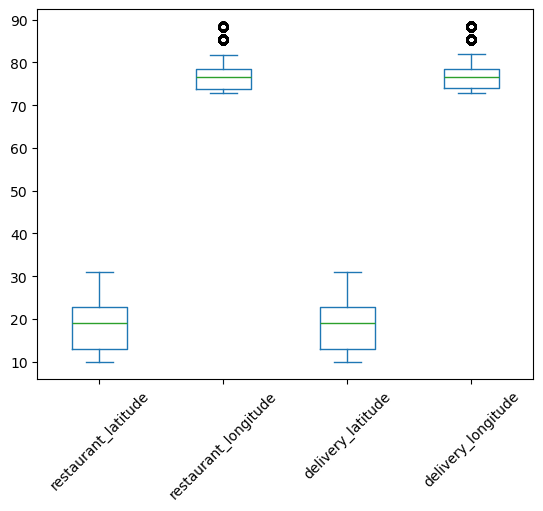

In [309]:
cleaned_data[location_columns].plot(kind="box")
plt.xticks(rotation=45);

In [310]:
cleaned_data[location_columns].describe()

restaurant_latitude  restaurant_longitude  delivery_latitude  \
count         41872.000000          41872.000000       41872.000000   
mean             18.913696             76.921664          18.977356   
std               5.467265              3.503107           5.469056   
min               9.957144             72.768726           9.967144   
25%              12.986047             73.897902          13.065996   
50%              19.065838             76.618203          19.124049   
75%              22.751234             78.368855          22.820040   
max              30.914057             88.433452          31.054057   

       delivery_longitude  
count        41872.000000  
mean            76.985325  
std              3.503260  
min             72.778726  
25%             73.940327  
50%             76.662620  
75%             78.405467  
max             88.563452

### Categorical columns

In [311]:
categorical_cols = cleaned_data.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    print(f"For {col}, unique values are: {cleaned_data[col].unique()}", end="\n\n")

For rider_id, unique values are: ['INDORES13DEL02' 'BANGRES18DEL02' 'BANGRES19DEL01' ... 'KOCRES04DEL01'
 'BHPRES06DEL03' 'GOARES03DEL03']

For weather, unique values are: ['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy' nan]

For traffic, unique values are: ['high' 'jam' 'low' 'medium' nan]

For type_of_order, unique values are: ['snack' 'drinks' 'buffet' 'meal']

For type_of_vehicle, unique values are: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']

For festival, unique values are: ['no' 'yes' nan]

For city_type, unique values are: ['urban' 'metropolitian' 'semi-urban' nan]

For city_name, unique values are: ['INDO' 'BANG' 'COIMB' 'CHEN' 'HYD' 'RANCHI' 'MYS' 'DEH' 'KOC' 'PUNE'
 'LUDH' 'KNP' 'MUM' 'KOL' 'JAP' 'SUR' 'GOA' 'AURG' 'AGR' 'VAD' 'ALH' 'BHP']

For distance_type, unique values are: ['short', 'very_long', 'medium', 'long', NaN]
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']

For order_day_of_week, unique values are: ['saturday' 'friday' 'tuesd

### Missing values

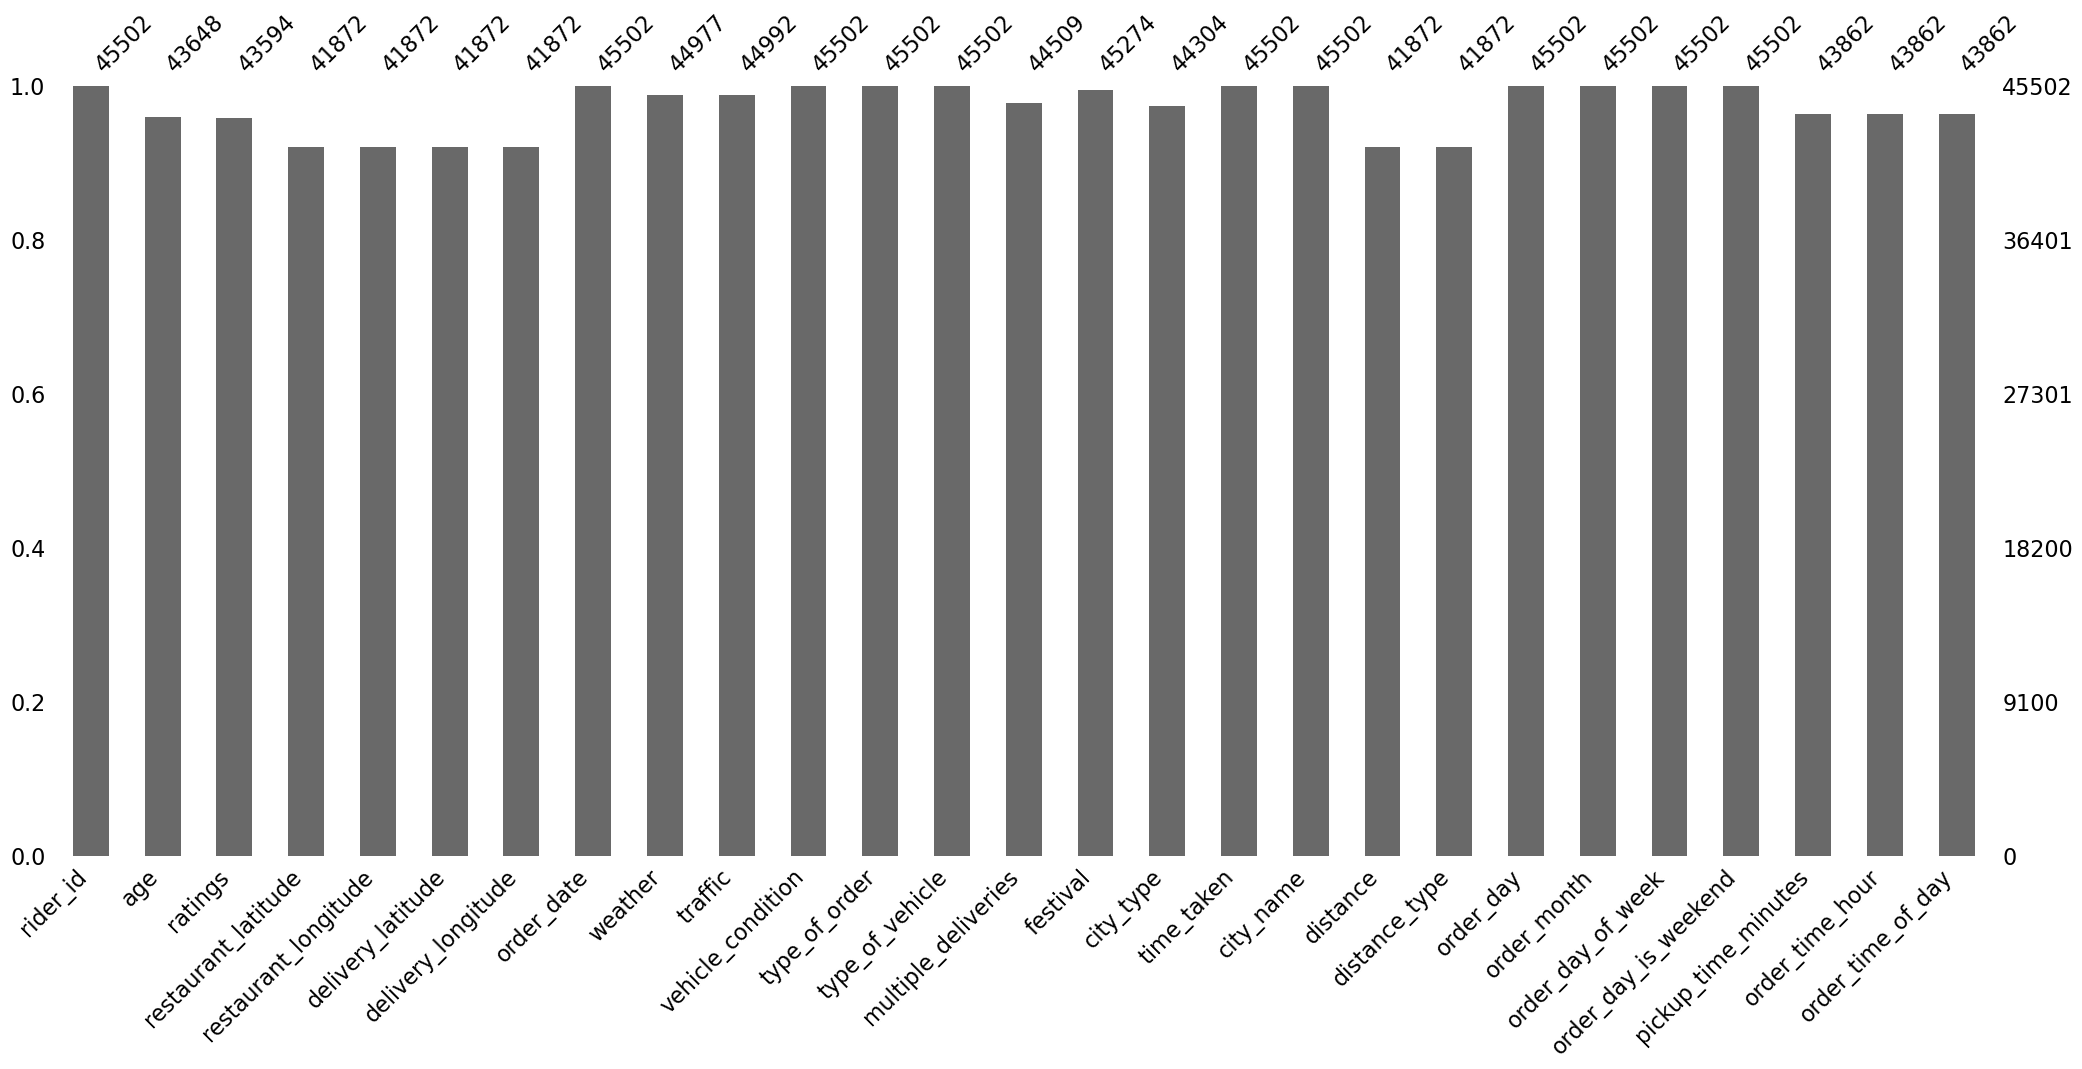

In [312]:
msno.bar(cleaned_data);

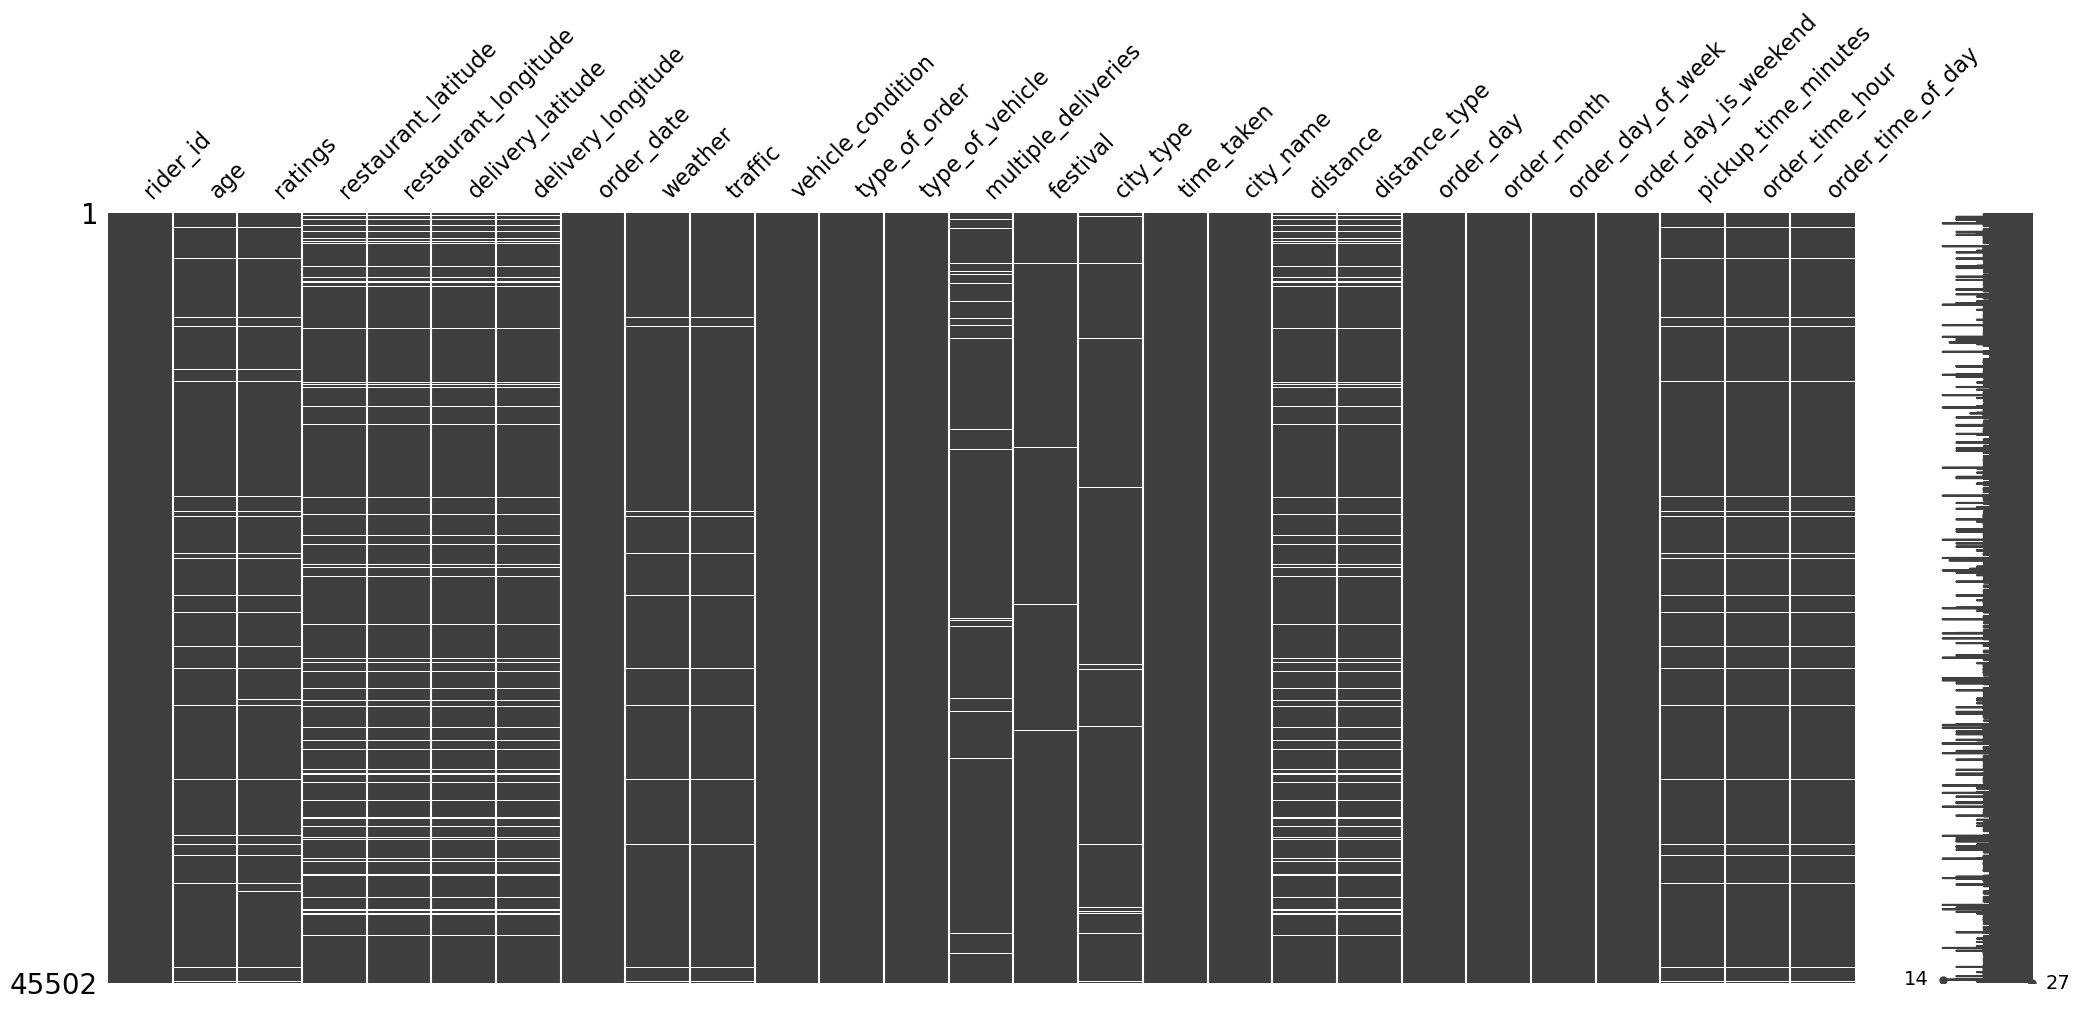

In [313]:
msno.matrix(cleaned_data);

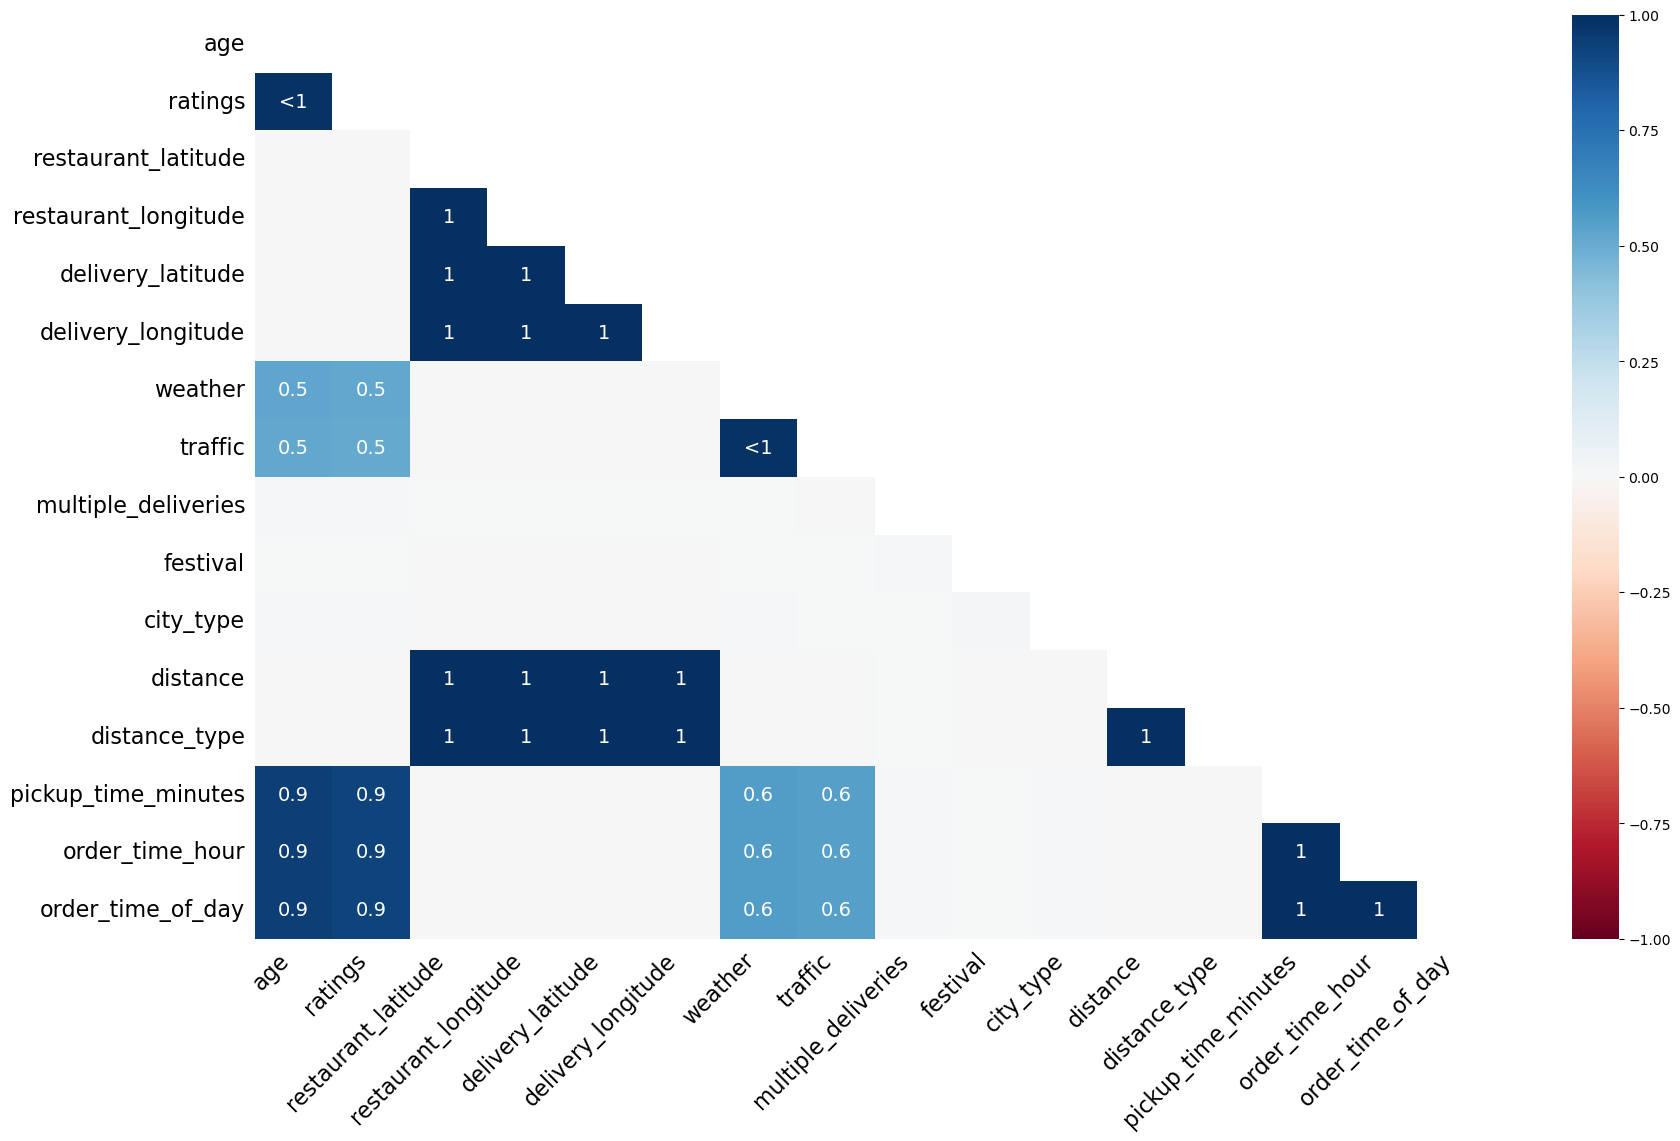

In [314]:
msno.heatmap(cleaned_data);

## Saving the cleaned data

In [315]:
cleaned_data.to_csv("cleaned_data.csv", index=False)

In [316]:
loaded_cleaned_data = pd.read_csv("cleaned_data.csv")
loaded_cleaned_data.head()

rider_id   age  ratings  restaurant_latitude  restaurant_longitude  \
0   INDORES13DEL02  37.0      4.9            22.745049             75.892471   
1   BANGRES18DEL02  34.0      4.5            12.913041             77.683237   
2   BANGRES19DEL01  23.0      4.4            12.914264             77.678400   
3  COIMBRES13DEL02  38.0      4.7            11.003669             76.976494   
4   CHENRES12DEL01  32.0      4.6            12.972793             80.249982   

   delivery_latitude  delivery_longitude  order_date     weather traffic  \
0          22.765049           75.912471  2022-03-19       sunny    high   
1          13.043041           77.813237  2022-03-25      stormy     jam   
2          12.924264           77.688400  2022-03-19  sandstorms     low   
3          11.053669           77.026494  2022-04-05       sunny  medium   
4          13.012793           80.289982  2022-03-26      cloudy    high   

   vehicle_condition type_of_order type_of_vehicle  multiple_deliveries  \
0                  2         snack      motorcycle                  0.0   
1                  2         snack         scooter                  1.0   
2                  0        drinks      motorcycle                  1.0   
3                  0        buffet      motorcycle                  1.0   
4                  1         snack         scooter                  1.0   

  festival      city_type  time_taken city_name   distance distance_type  \
0       no          urban          24      INDO   3.025149         short   
1       no  metropolitian          33      BANG  20.183530     very_long   
2       no          urban          26      BANG   1.552758         short   
3       no  metropolitian          21     COIMB   7.790401        medium   
4       no  metropolitian          30      CHEN   6.210138        medium   

   order_day  order_month order_day_of_week  order_day_is_weekend  \
0         19            3          saturday                     1   
1         25            3            friday                     0   
2         19            3          saturday                     1   
3          5            4           tuesday                     0   
4         26            3          saturday                     1   

   pickup_time_minutes  order_time_hour order_time_of_day  
0                 15.0             11.0           morning  
1                  5.0             19.0           evening  
2                 15.0              8.0           morning  
3                 10.0             18.0           evening  
4                 15.0             13.0         afternoon

In [317]:
loaded_cleaned_data.dtypes

rider_id                 object
age                     float64
ratings                 float64
restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
order_date               object
weather                  object
traffic                  object
vehicle_condition         int64
type_of_order            object
type_of_vehicle          object
multiple_deliveries     float64
festival                 object
city_type                object
time_taken                int64
city_name                object
distance                float64
distance_type            object
order_day                 int64
order_month               int64
order_day_of_week        object
order_day_is_weekend      int64
pickup_time_minutes     float64
order_time_hour         float64
order_time_of_day        object
dtype: object